# Import headers & Libraries




## 1.Import libraries


In [ ]:
#import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## 2.Import headers
Will add headers after the data cleaning


In [ ]:
""" headers_data = [""]
print("headers\n", type(headers_data))
"""


' headers_data = [""]\nprint("headers\n", type(headers_data))\n'

# **Load the dataset**


1.   Check the dataset.
2.   List item



In [ ]:
#load dataset
data = pd.read_csv("/content/leukemia.csv", header=None)

## 1.Check the dataset  using head()


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,7061,7062,7063,7064,7065,7066,7067,7068,7069,7070
0,151,72,281,36,-299,57,186,1647,137,803,...,511,-125,389,-37,793,329,36,191,-37,1
1,263,21,250,43,-103,169,219,2043,188,756,...,837,-36,442,-17,782,295,11,76,-14,1
2,88,-27,358,42,142,359,237,1997,91,2514,...,1199,33,168,52,1138,777,41,228,-41,1
3,484,61,118,39,-11,274,245,2128,-82,1489,...,835,218,174,-110,627,170,-50,126,-91,1
4,118,16,197,39,237,311,186,1608,204,322,...,649,57,504,-26,250,314,14,56,-25,1


## 2.Get the information about the data using info()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 7071 entries, 0 to 7070
dtypes: int64(7071)
memory usage: 3.9 MB


## 3.Get the shape of the dataset using shape


In [ ]:
data.shape


(72, 7071)

## 4.Describe the dataset using describe()

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,7061,7062,7063,7064,7065,7066,7067,7068,7069,7070
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.00000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,278.013889,30.805556,296.250000,44.444444,24.722222,214.208333,179.222222,1824.083333,143.666667,753.013889,...,668.37500,-11.750000,381.805556,-33.666667,780.555556,303.944444,9.569444,433.486111,-30.569444,0.652778
std,189.318979,66.629655,373.146414,47.778506,203.801286,182.164756,114.225404,562.957826,144.610502,387.564606,...,305.72336,87.403347,378.516029,52.052249,451.249904,206.500137,44.874732,623.918444,40.192434,0.479428
min,20.000000,-212.000000,65.000000,-61.000000,-520.000000,-41.000000,2.000000,714.000000,-112.000000,180.000000,...,91.00000,-295.000000,-24.000000,-220.000000,67.000000,-42.000000,-207.000000,-68.000000,-190.000000,0.000000
25%,125.750000,-0.750000,126.250000,19.750000,-82.250000,89.750000,99.750000,1434.500000,59.250000,494.500000,...,462.50000,-53.500000,200.000000,-63.000000,519.000000,173.750000,-8.000000,123.500000,-54.750000,0.000000
50%,255.000000,30.000000,184.000000,39.000000,10.500000,173.500000,169.000000,1777.500000,112.000000,744.500000,...,632.50000,3.000000,286.000000,-24.500000,701.500000,295.000000,9.500000,218.000000,-28.500000,1.000000
75%,383.500000,64.250000,259.250000,53.000000,125.000000,285.000000,219.250000,2119.750000,205.250000,929.500000,...,823.00000,45.250000,456.750000,2.500000,1016.000000,386.500000,29.500000,373.000000,-3.750000,1.000000
max,1106.000000,249.000000,2194.000000,202.000000,845.000000,971.000000,556.000000,3570.000000,566.000000,2514.000000,...,1653.00000,218.000000,2527.000000,52.000000,2315.000000,1109.000000,115.000000,3193.000000,78.000000,1.000000


## 5.Check columns


In [ ]:
columns= data.columns
columns


Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       7061, 7062, 7063, 7064, 7065, 7066, 7067, 7068, 7069, 7070],
      dtype='int64', length=7071)

# **Data Preprocessing**


## 1.NULL value checking


In [ ]:
data.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
7066    0
7067    0
7068    0
7069    0
7070    0
Length: 7071, dtype: int64

## 2.Check duplicated values in rows



In [ ]:
duplicated_values= data[data.duplicated()]
duplicated_values

,0,1,2,3,4,5,6,7,8,9,...,7061,7062,7063,7064,7065,7066,7067,7068,7069,7070


## 3.Check duplicate columns in dataset


In [ ]:
# Find duplicate columns
duplicate_columns = set()
for i in range(len(data.columns)):
    for j in range(i + 1, len(data.columns)):
        if data[data.columns[i]].equals(data[data.columns[j]]):
            duplicate_columns.add(data.columns[i])

if len(duplicate_columns) == 0:
    print("No duplicate columns found.")
else:
    print("Duplicate columns found:", duplicate_columns)

No duplicate columns found.





## 4.Remove the specified duplicate columns



In [ ]:
# cancer = data.drop(columns= ['913.2', '2070', '2340.1', '913', '2070.1', '2340', '2070.2', '913.1', '2340.2'])
# cancer = data.drop(columns= [ ])
cancer = data
cancer


,0,1,2,3,4,5,6,7,8,9,...,7061,7062,7063,7064,7065,7066,7067,7068,7069,7070
0,151,72,281,36,-299,57,186,1647,137,803,...,511,-125,389,-37,793,329,36,191,-37,1
1,263,21,250,43,-103,169,219,2043,188,756,...,837,-36,442,-17,782,295,11,76,-14,1
2,88,-27,358,42,142,359,237,1997,91,2514,...,1199,33,168,52,1138,777,41,228,-41,1
3,484,61,118,39,-11,274,245,2128,-82,1489,...,835,218,174,-110,627,170,-50,126,-91,1
4,118,16,197,39,237,311,186,1608,204,322,...,649,57,504,-26,250,314,14,56,-25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,316,0,105,104,-76,38,261,1397,60,675,...,532,-34,239,-78,707,354,-22,260,5,0
68,228,36,106,113,19,141,165,1030,73,499,...,297,36,358,2,423,41,0,1777,-49,0
69,395,73,334,73,417,259,359,2656,318,1001,...,639,-27,548,-39,809,445,-2,210,16,0
70,311,-56,235,46,845,168,517,3570,92,973,...,1141,-121,197,-108,466,349,0,284,-73,0


## 5.Delete duplicated rows:

In [ ]:
cancer = cancer.drop_duplicates()

# # Optionally, you can reset the index after removing duplicates
# # df = df.reset_index(drop=True)

# # Save the cleaned dataset if needed
# # df.to_csv('cleaned_dataset.csv', index=False)

# # Display the cleaned dataset
print("Dataset after removing duplicates:")
print(cancer)

Dataset after removing duplicates:
    0     1     2     3     4     5     6     7     8     9     ...  7061  \
0    151    72   281    36  -299    57   186  1647   137   803  ...   511   
1    263    21   250    43  -103   169   219  2043   188   756  ...   837   
2     88   -27   358    42   142   359   237  1997    91  2514  ...  1199   
3    484    61   118    39   -11   274   245  2128   -82  1489  ...   835   
4    118    16   197    39   237   311   186  1608   204   322  ...   649   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
67   316     0   105   104   -76    38   261  1397    60   675  ...   532   
68   228    36   106   113    19   141   165  1030    73   499  ...   297   
69   395    73   334    73   417   259   359  2656   318  1001  ...   639   
70   311   -56   235    46   845   168   517  3570    92   973  ...  1141   
71   373   -23   377   -34   403    85   152  1844    64   741  ...   574   

    7062  7063  7064  7065  7066  7067  

## 6.Reset the index after removing duplicates

In [ ]:
cancer=cancer.reset_index(drop=True)

# **Save the cleaned dataset.**

In [ ]:
cancer.to_csv('cleaned_cancer.csv', index=False)

## 1.Load cleaned dataset


In [ ]:
cd = pd.read_csv("/content/cleaned_cancer.csv")


## 2.Check the cleaned dataset shape


In [ ]:
cd.shape

(72, 7071)

## 3.Check duplicated rows in cleaned dataset

In [ ]:
duplicated_values= cd[cd.duplicated()]
duplicated_values

,0,1,2,3,4,5,6,7,8,9,...,7061,7062,7063,7064,7065,7066,7067,7068,7069,7070


## 4.Creating Header names


In [ ]:
# Define the number of columns (n)
n = 7071 # Change this to the desired number of columns

# Generate the list of headers with single quotes
headers = [f'"F{i}"' for i in range(1, n + 1)]

# Join the headers together
joined_headers = ', '.join(headers)

# Print the joined headers
print(joined_headers)

"F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22", "F23", "F24", "F25", "F26", "F27", "F28", "F29", "F30", "F31", "F32", "F33", "F34", "F35", "F36", "F37", "F38", "F39", "F40", "F41", "F42", "F43", "F44", "F45", "F46", "F47", "F48", "F49", "F50", "F51", "F52", "F53", "F54", "F55", "F56", "F57", "F58", "F59", "F60", "F61", "F62", "F63", "F64", "F65", "F66", "F67", "F68", "F69", "F70", "F71", "F72", "F73", "F74", "F75", "F76", "F77", "F78", "F79", "F80", "F81", "F82", "F83", "F84", "F85", "F86", "F87", "F88", "F89", "F90", "F91", "F92", "F93", "F94", "F95", "F96", "F97", "F98", "F99", "F100", "F101", "F102", "F103", "F104", "F105", "F106", "F107", "F108", "F109", "F110", "F111", "F112", "F113", "F114", "F115", "F116", "F117", "F118", "F119", "F120", "F121", "F122", "F123", "F124", "F125", "F126", "F127", "F128", "F129", "F130", "F131", "F132", "F133", "F134", "F135", "F136", "F137", "F138", "F13

## 5.Putting header names in one list


In [ ]:
headers_data = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22", "F23", "F24", "F25", "F26", "F27", "F28", "F29", "F30", "F31", "F32", "F33", "F34", "F35", "F36", "F37", "F38", "F39", "F40", "F41", "F42", "F43", "F44", "F45", "F46", "F47", "F48", "F49", "F50", "F51", "F52", "F53", "F54", "F55", "F56", "F57", "F58", "F59", "F60", "F61", "F62", "F63", "F64", "F65", "F66", "F67", "F68", "F69", "F70", "F71", "F72", "F73", "F74", "F75", "F76", "F77", "F78", "F79", "F80", "F81", "F82", "F83", "F84", "F85", "F86", "F87", "F88", "F89", "F90", "F91", "F92", "F93", "F94", "F95", "F96", "F97", "F98", "F99", "F100", "F101", "F102", "F103", "F104", "F105", "F106", "F107", "F108", "F109", "F110", "F111", "F112", "F113", "F114", "F115", "F116", "F117", "F118", "F119", "F120", "F121", "F122", "F123", "F124", "F125", "F126", "F127", "F128", "F129", "F130", "F131", "F132", "F133", "F134", "F135", "F136", "F137", "F138", "F139", "F140", "F141", "F142", "F143", "F144", "F145", "F146", "F147", "F148", "F149", "F150", "F151", "F152", "F153", "F154", "F155", "F156", "F157", "F158", "F159", "F160", "F161", "F162", "F163", "F164", "F165", "F166", "F167", "F168", "F169", "F170", "F171", "F172", "F173", "F174", "F175", "F176", "F177", "F178", "F179", "F180", "F181", "F182", "F183", "F184", "F185", "F186", "F187", "F188", "F189", "F190", "F191", "F192", "F193", "F194", "F195", "F196", "F197", "F198", "F199", "F200", "F201", "F202", "F203", "F204", "F205", "F206", "F207", "F208", "F209", "F210", "F211", "F212", "F213", "F214", "F215", "F216", "F217", "F218", "F219", "F220", "F221", "F222", "F223", "F224", "F225", "F226", "F227", "F228", "F229", "F230", "F231", "F232", "F233", "F234", "F235", "F236", "F237", "F238", "F239", "F240", "F241", "F242", "F243", "F244", "F245", "F246", "F247", "F248", "F249", "F250", "F251", "F252", "F253", "F254", "F255", "F256", "F257", "F258", "F259", "F260", "F261", "F262", "F263", "F264", "F265", "F266", "F267", "F268", "F269", "F270", "F271", "F272", "F273", "F274", "F275", "F276", "F277", "F278", "F279", "F280", "F281", "F282", "F283", "F284", "F285", "F286", "F287", "F288", "F289", "F290", "F291", "F292", "F293", "F294", "F295", "F296", "F297", "F298", "F299", "F300", "F301", "F302", "F303", "F304", "F305", "F306", "F307", "F308", "F309", "F310", "F311", "F312", "F313", "F314", "F315", "F316", "F317", "F318", "F319", "F320", "F321", "F322", "F323", "F324", "F325", "F326", "F327", "F328", "F329", "F330", "F331", "F332", "F333", "F334", "F335", "F336", "F337", "F338", "F339", "F340", "F341", "F342", "F343", "F344", "F345", "F346", "F347", "F348", "F349", "F350", "F351", "F352", "F353", "F354", "F355", "F356", "F357", "F358", "F359", "F360", "F361", "F362", "F363", "F364", "F365", "F366", "F367", "F368", "F369", "F370", "F371", "F372", "F373", "F374", "F375", "F376", "F377", "F378", "F379", "F380", "F381", "F382", "F383", "F384", "F385", "F386", "F387", "F388", "F389", "F390", "F391", "F392", "F393", "F394", "F395", "F396", "F397", "F398", "F399", "F400", "F401", "F402", "F403", "F404", "F405", "F406", "F407", "F408", "F409", "F410", "F411", "F412", "F413", "F414", "F415", "F416", "F417", "F418", "F419", "F420", "F421", "F422", "F423", "F424", "F425", "F426", "F427", "F428", "F429", "F430", "F431", "F432", "F433", "F434", "F435", "F436", "F437", "F438", "F439", "F440", "F441", "F442", "F443", "F444", "F445", "F446", "F447", "F448", "F449", "F450", "F451", "F452", "F453", "F454", "F455", "F456", "F457", "F458", "F459", "F460", "F461", "F462", "F463", "F464", "F465", "F466", "F467", "F468", "F469", "F470", "F471", "F472", "F473", "F474", "F475", "F476", "F477", "F478", "F479", "F480", "F481", "F482", "F483", "F484", "F485", "F486", "F487", "F488", "F489", "F490", "F491", "F492", "F493", "F494", "F495", "F496", "F497", "F498", "F499", "F500", "F501", "F502", "F503", "F504", "F505", "F506", "F507", "F508", "F509", "F510", "F511", "F512", "F513", "F514", "F515", "F516", "F517", "F518", "F519", "F520", "F521", "F522", "F523", "F524", "F525", "F526", "F527", "F528", "F529", "F530", "F531", "F532", "F533", "F534", "F535", "F536", "F537", "F538", "F539", "F540", "F541", "F542", "F543", "F544", "F545", "F546", "F547", "F548", "F549", "F550", "F551", "F552", "F553", "F554", "F555", "F556", "F557", "F558", "F559", "F560", "F561", "F562", "F563", "F564", "F565", "F566", "F567", "F568", "F569", "F570", "F571", "F572", "F573", "F574", "F575", "F576", "F577", "F578", "F579", "F580", "F581", "F582", "F583", "F584", "F585", "F586", "F587", "F588", "F589", "F590", "F591", "F592", "F593", "F594", "F595", "F596", "F597", "F598", "F599", "F600", "F601", "F602", "F603", "F604", "F605", "F606", "F607", "F608", "F609", "F610", "F611", "F612", "F613", "F614", "F615", "F616", "F617", "F618", "F619", "F620", "F621", "F622", "F623", "F624", "F625", "F626", "F627", "F628", "F629", "F630", "F631", "F632", "F633", "F634", "F635", "F636", "F637", "F638", "F639", "F640", "F641", "F642", "F643", "F644", "F645", "F646", "F647", "F648", "F649", "F650", "F651", "F652", "F653", "F654", "F655", "F656", "F657", "F658", "F659", "F660", "F661", "F662", "F663", "F664", "F665", "F666", "F667", "F668", "F669", "F670", "F671", "F672", "F673", "F674", "F675", "F676", "F677", "F678", "F679", "F680", "F681", "F682", "F683", "F684", "F685", "F686", "F687", "F688", "F689", "F690", "F691", "F692", "F693", "F694", "F695", "F696", "F697", "F698", "F699", "F700", "F701", "F702", "F703", "F704", "F705", "F706", "F707", "F708", "F709", "F710", "F711", "F712", "F713", "F714", "F715", "F716", "F717", "F718", "F719", "F720", "F721", "F722", "F723", "F724", "F725", "F726", "F727", "F728", "F729", "F730", "F731", "F732", "F733", "F734", "F735", "F736", "F737", "F738", "F739", "F740", "F741", "F742", "F743", "F744", "F745", "F746", "F747", "F748", "F749", "F750", "F751", "F752", "F753", "F754", "F755", "F756", "F757", "F758", "F759", "F760", "F761", "F762", "F763", "F764", "F765", "F766", "F767", "F768", "F769", "F770", "F771", "F772", "F773", "F774", "F775", "F776", "F777", "F778", "F779", "F780", "F781", "F782", "F783", "F784", "F785", "F786", "F787", "F788", "F789", "F790", "F791", "F792", "F793", "F794", "F795", "F796", "F797", "F798", "F799", "F800", "F801", "F802", "F803", "F804", "F805", "F806", "F807", "F808", "F809", "F810", "F811", "F812", "F813", "F814", "F815", "F816", "F817", "F818", "F819", "F820", "F821", "F822", "F823", "F824", "F825", "F826", "F827", "F828", "F829", "F830", "F831", "F832", "F833", "F834", "F835", "F836", "F837", "F838", "F839", "F840", "F841", "F842", "F843", "F844", "F845", "F846", "F847", "F848", "F849", "F850", "F851", "F852", "F853", "F854", "F855", "F856", "F857", "F858", "F859", "F860", "F861", "F862", "F863", "F864", "F865", "F866", "F867", "F868", "F869", "F870", "F871", "F872", "F873", "F874", "F875", "F876", "F877", "F878", "F879", "F880", "F881", "F882", "F883", "F884", "F885", "F886", "F887", "F888", "F889", "F890", "F891", "F892", "F893", "F894", "F895", "F896", "F897", "F898", "F899", "F900", "F901", "F902", "F903", "F904", "F905", "F906", "F907", "F908", "F909", "F910", "F911", "F912", "F913", "F914", "F915", "F916", "F917", "F918", "F919", "F920", "F921", "F922", "F923", "F924", "F925", "F926", "F927", "F928", "F929", "F930", "F931", "F932", "F933", "F934", "F935", "F936", "F937", "F938", "F939", "F940", "F941", "F942", "F943", "F944", "F945", "F946", "F947", "F948", "F949", "F950", "F951", "F952", "F953", "F954", "F955", "F956", "F957", "F958", "F959", "F960", "F961", "F962", "F963", "F964", "F965", "F966", "F967", "F968", "F969", "F970", "F971", "F972", "F973", "F974", "F975", "F976", "F977", "F978", "F979", "F980", "F981", "F982", "F983", "F984", "F985", "F986", "F987", "F988", "F989", "F990", "F991", "F992", "F993", "F994", "F995", "F996", "F997", "F998", "F999", "F1000", "F1001", "F1002", "F1003", "F1004", "F1005", "F1006", "F1007", "F1008", "F1009", "F1010", "F1011", "F1012", "F1013", "F1014", "F1015", "F1016", "F1017", "F1018", "F1019", "F1020", "F1021", "F1022", "F1023", "F1024", "F1025", "F1026", "F1027", "F1028", "F1029", "F1030", "F1031", "F1032", "F1033", "F1034", "F1035", "F1036", "F1037", "F1038", "F1039", "F1040", "F1041", "F1042", "F1043", "F1044", "F1045", "F1046", "F1047", "F1048", "F1049", "F1050", "F1051", "F1052", "F1053", "F1054", "F1055", "F1056", "F1057", "F1058", "F1059", "F1060", "F1061", "F1062", "F1063", "F1064", "F1065", "F1066", "F1067", "F1068", "F1069", "F1070", "F1071", "F1072", "F1073", "F1074", "F1075", "F1076", "F1077", "F1078", "F1079", "F1080", "F1081", "F1082", "F1083", "F1084", "F1085", "F1086", "F1087", "F1088", "F1089", "F1090", "F1091", "F1092", "F1093", "F1094", "F1095", "F1096", "F1097", "F1098", "F1099", "F1100", "F1101", "F1102", "F1103", "F1104", "F1105", "F1106", "F1107", "F1108", "F1109", "F1110", "F1111", "F1112", "F1113", "F1114", "F1115", "F1116", "F1117", "F1118", "F1119", "F1120", "F1121", "F1122", "F1123", "F1124", "F1125", "F1126", "F1127", "F1128", "F1129", "F1130", "F1131", "F1132", "F1133", "F1134", "F1135", "F1136", "F1137", "F1138", "F1139", "F1140", "F1141", "F1142", "F1143", "F1144", "F1145", "F1146", "F1147", "F1148", "F1149", "F1150", "F1151", "F1152", "F1153", "F1154", "F1155", "F1156", "F1157", "F1158", "F1159", "F1160", "F1161", "F1162", "F1163", "F1164", "F1165", "F1166", "F1167", "F1168", "F1169", "F1170", "F1171", "F1172", "F1173", "F1174", "F1175", "F1176", "F1177", "F1178", "F1179", "F1180", "F1181", "F1182", "F1183", "F1184", "F1185", "F1186", "F1187", "F1188", "F1189", "F1190", "F1191", "F1192", "F1193", "F1194", "F1195", "F1196", "F1197", "F1198", "F1199", "F1200", "F1201", "F1202", "F1203", "F1204", "F1205", "F1206", "F1207", "F1208", "F1209", "F1210", "F1211", "F1212", "F1213", "F1214", "F1215", "F1216", "F1217", "F1218", "F1219", "F1220", "F1221", "F1222", "F1223", "F1224", "F1225", "F1226", "F1227", "F1228", "F1229", "F1230", "F1231", "F1232", "F1233", "F1234", "F1235", "F1236", "F1237", "F1238", "F1239", "F1240", "F1241", "F1242", "F1243", "F1244", "F1245", "F1246", "F1247", "F1248", "F1249", "F1250", "F1251", "F1252", "F1253", "F1254", "F1255", "F1256", "F1257", "F1258", "F1259", "F1260", "F1261", "F1262", "F1263", "F1264", "F1265", "F1266", "F1267", "F1268", "F1269", "F1270", "F1271", "F1272", "F1273", "F1274", "F1275", "F1276", "F1277", "F1278", "F1279", "F1280", "F1281", "F1282", "F1283", "F1284", "F1285", "F1286", "F1287", "F1288", "F1289", "F1290", "F1291", "F1292", "F1293", "F1294", "F1295", "F1296", "F1297", "F1298", "F1299", "F1300", "F1301", "F1302", "F1303", "F1304", "F1305", "F1306", "F1307", "F1308", "F1309", "F1310", "F1311", "F1312", "F1313", "F1314", "F1315", "F1316", "F1317", "F1318", "F1319", "F1320", "F1321", "F1322", "F1323", "F1324", "F1325", "F1326", "F1327", "F1328", "F1329", "F1330", "F1331", "F1332", "F1333", "F1334", "F1335", "F1336", "F1337", "F1338", "F1339", "F1340", "F1341", "F1342", "F1343", "F1344", "F1345", "F1346", "F1347", "F1348", "F1349", "F1350", "F1351", "F1352", "F1353", "F1354", "F1355", "F1356", "F1357", "F1358", "F1359", "F1360", "F1361", "F1362", "F1363", "F1364", "F1365", "F1366", "F1367", "F1368", "F1369", "F1370", "F1371", "F1372", "F1373", "F1374", "F1375", "F1376", "F1377", "F1378", "F1379", "F1380", "F1381", "F1382", "F1383", "F1384", "F1385", "F1386", "F1387", "F1388", "F1389", "F1390", "F1391", "F1392", "F1393", "F1394", "F1395", "F1396", "F1397", "F1398", "F1399", "F1400", "F1401", "F1402", "F1403", "F1404", "F1405", "F1406", "F1407", "F1408", "F1409", "F1410", "F1411", "F1412", "F1413", "F1414", "F1415", "F1416", "F1417", "F1418", "F1419", "F1420", "F1421", "F1422", "F1423", "F1424", "F1425", "F1426", "F1427", "F1428", "F1429", "F1430", "F1431", "F1432", "F1433", "F1434", "F1435", "F1436", "F1437", "F1438", "F1439", "F1440", "F1441", "F1442", "F1443", "F1444", "F1445", "F1446", "F1447", "F1448", "F1449", "F1450", "F1451", "F1452", "F1453", "F1454", "F1455", "F1456", "F1457", "F1458", "F1459", "F1460", "F1461", "F1462", "F1463", "F1464", "F1465", "F1466", "F1467", "F1468", "F1469", "F1470", "F1471", "F1472", "F1473", "F1474", "F1475", "F1476", "F1477", "F1478", "F1479", "F1480", "F1481", "F1482", "F1483", "F1484", "F1485", "F1486", "F1487", "F1488", "F1489", "F1490", "F1491", "F1492", "F1493", "F1494", "F1495", "F1496", "F1497", "F1498", "F1499", "F1500", "F1501", "F1502", "F1503", "F1504", "F1505", "F1506", "F1507", "F1508", "F1509", "F1510", "F1511", "F1512", "F1513", "F1514", "F1515", "F1516", "F1517", "F1518", "F1519", "F1520", "F1521", "F1522", "F1523", "F1524", "F1525", "F1526", "F1527", "F1528", "F1529", "F1530", "F1531", "F1532", "F1533", "F1534", "F1535", "F1536", "F1537", "F1538", "F1539", "F1540", "F1541", "F1542", "F1543", "F1544", "F1545", "F1546", "F1547", "F1548", "F1549", "F1550", "F1551", "F1552", "F1553", "F1554", "F1555", "F1556", "F1557", "F1558", "F1559", "F1560", "F1561", "F1562", "F1563", "F1564", "F1565", "F1566", "F1567", "F1568", "F1569", "F1570", "F1571", "F1572", "F1573", "F1574", "F1575", "F1576", "F1577", "F1578", "F1579", "F1580", "F1581", "F1582", "F1583", "F1584", "F1585", "F1586", "F1587", "F1588", "F1589", "F1590", "F1591", "F1592", "F1593", "F1594", "F1595", "F1596", "F1597", "F1598", "F1599", "F1600", "F1601", "F1602", "F1603", "F1604", "F1605", "F1606", "F1607", "F1608", "F1609", "F1610", "F1611", "F1612", "F1613", "F1614", "F1615", "F1616", "F1617", "F1618", "F1619", "F1620", "F1621", "F1622", "F1623", "F1624", "F1625", "F1626", "F1627", "F1628", "F1629", "F1630", "F1631", "F1632", "F1633", "F1634", "F1635", "F1636", "F1637", "F1638", "F1639", "F1640", "F1641", "F1642", "F1643", "F1644", "F1645", "F1646", "F1647", "F1648", "F1649", "F1650", "F1651", "F1652", "F1653", "F1654", "F1655", "F1656", "F1657", "F1658", "F1659", "F1660", "F1661", "F1662", "F1663", "F1664", "F1665", "F1666", "F1667", "F1668", "F1669", "F1670", "F1671", "F1672", "F1673", "F1674", "F1675", "F1676", "F1677", "F1678", "F1679", "F1680", "F1681", "F1682", "F1683", "F1684", "F1685", "F1686", "F1687", "F1688", "F1689", "F1690", "F1691", "F1692", "F1693", "F1694", "F1695", "F1696", "F1697", "F1698", "F1699", "F1700", "F1701", "F1702", "F1703", "F1704", "F1705", "F1706", "F1707", "F1708", "F1709", "F1710", "F1711", "F1712", "F1713", "F1714", "F1715", "F1716", "F1717", "F1718", "F1719", "F1720", "F1721", "F1722", "F1723", "F1724", "F1725", "F1726", "F1727", "F1728", "F1729", "F1730", "F1731", "F1732", "F1733", "F1734", "F1735", "F1736", "F1737", "F1738", "F1739", "F1740", "F1741", "F1742", "F1743", "F1744", "F1745", "F1746", "F1747", "F1748", "F1749", "F1750", "F1751", "F1752", "F1753", "F1754", "F1755", "F1756", "F1757", "F1758", "F1759", "F1760", "F1761", "F1762", "F1763", "F1764", "F1765", "F1766", "F1767", "F1768", "F1769", "F1770", "F1771", "F1772", "F1773", "F1774", "F1775", "F1776", "F1777", "F1778", "F1779", "F1780", "F1781", "F1782", "F1783", "F1784", "F1785", "F1786", "F1787", "F1788", "F1789", "F1790", "F1791", "F1792", "F1793", "F1794", "F1795", "F1796", "F1797", "F1798", "F1799", "F1800", "F1801", "F1802", "F1803", "F1804", "F1805", "F1806", "F1807", "F1808", "F1809", "F1810", "F1811", "F1812", "F1813", "F1814", "F1815", "F1816", "F1817", "F1818", "F1819", "F1820", "F1821", "F1822", "F1823", "F1824", "F1825", "F1826", "F1827", "F1828", "F1829", "F1830", "F1831", "F1832", "F1833", "F1834", "F1835", "F1836", "F1837", "F1838", "F1839", "F1840", "F1841", "F1842", "F1843", "F1844", "F1845", "F1846", "F1847", "F1848", "F1849", "F1850", "F1851", "F1852", "F1853", "F1854", "F1855", "F1856", "F1857", "F1858", "F1859", "F1860", "F1861", "F1862", "F1863", "F1864", "F1865", "F1866", "F1867", "F1868", "F1869", "F1870", "F1871", "F1872", "F1873", "F1874", "F1875", "F1876", "F1877", "F1878", "F1879", "F1880", "F1881", "F1882", "F1883", "F1884", "F1885", "F1886", "F1887", "F1888", "F1889", "F1890", "F1891", "F1892", "F1893", "F1894", "F1895", "F1896", "F1897", "F1898", "F1899", "F1900", "F1901", "F1902", "F1903", "F1904", "F1905", "F1906", "F1907", "F1908", "F1909", "F1910", "F1911", "F1912", "F1913", "F1914", "F1915", "F1916", "F1917", "F1918", "F1919", "F1920", "F1921", "F1922", "F1923", "F1924", "F1925", "F1926", "F1927", "F1928", "F1929", "F1930", "F1931", "F1932", "F1933", "F1934", "F1935", "F1936", "F1937", "F1938", "F1939", "F1940", "F1941", "F1942", "F1943", "F1944", "F1945", "F1946", "F1947", "F1948", "F1949", "F1950", "F1951", "F1952", "F1953", "F1954", "F1955", "F1956", "F1957", "F1958", "F1959", "F1960", "F1961", "F1962", "F1963", "F1964", "F1965", "F1966", "F1967", "F1968", "F1969", "F1970", "F1971", "F1972", "F1973", "F1974", "F1975", "F1976", "F1977", "F1978", "F1979", "F1980", "F1981", "F1982", "F1983", "F1984", "F1985", "F1986", "F1987", "F1988", "F1989", "F1990", "F1991", "F1992", "F1993", "F1994", "F1995", "F1996", "F1997", "F1998", "F1999", "F2000", "F2001", "F2002", "F2003", "F2004", "F2005", "F2006", "F2007", "F2008", "F2009", "F2010", "F2011", "F2012", "F2013", "F2014", "F2015", "F2016", "F2017", "F2018", "F2019", "F2020", "F2021", "F2022", "F2023", "F2024", "F2025", "F2026", "F2027", "F2028", "F2029", "F2030", "F2031", "F2032", "F2033", "F2034", "F2035", "F2036", "F2037", "F2038", "F2039", "F2040", "F2041", "F2042", "F2043", "F2044", "F2045", "F2046", "F2047", "F2048", "F2049", "F2050", "F2051", "F2052", "F2053", "F2054", "F2055", "F2056", "F2057", "F2058", "F2059", "F2060", "F2061", "F2062", "F2063", "F2064", "F2065", "F2066", "F2067", "F2068", "F2069", "F2070", "F2071", "F2072", "F2073", "F2074", "F2075", "F2076", "F2077", "F2078", "F2079", "F2080", "F2081", "F2082", "F2083", "F2084", "F2085", "F2086", "F2087", "F2088", "F2089", "F2090", "F2091", "F2092", "F2093", "F2094", "F2095", "F2096", "F2097", "F2098", "F2099", "F2100", "F2101", "F2102", "F2103", "F2104", "F2105", "F2106", "F2107", "F2108", "F2109", "F2110", "F2111", "F2112", "F2113", "F2114", "F2115", "F2116", "F2117", "F2118", "F2119", "F2120", "F2121", "F2122", "F2123", "F2124", "F2125", "F2126", "F2127", "F2128", "F2129", "F2130", "F2131", "F2132", "F2133", "F2134", "F2135", "F2136", "F2137", "F2138", "F2139", "F2140", "F2141", "F2142", "F2143", "F2144", "F2145", "F2146", "F2147", "F2148", "F2149", "F2150", "F2151", "F2152", "F2153", "F2154", "F2155", "F2156", "F2157", "F2158", "F2159", "F2160", "F2161", "F2162", "F2163", "F2164", "F2165", "F2166", "F2167", "F2168", "F2169", "F2170", "F2171", "F2172", "F2173", "F2174", "F2175", "F2176", "F2177", "F2178", "F2179", "F2180", "F2181", "F2182", "F2183", "F2184", "F2185", "F2186", "F2187", "F2188", "F2189", "F2190", "F2191", "F2192", "F2193", "F2194", "F2195", "F2196", "F2197", "F2198", "F2199", "F2200", "F2201", "F2202", "F2203", "F2204", "F2205", "F2206", "F2207", "F2208", "F2209", "F2210", "F2211", "F2212", "F2213", "F2214", "F2215", "F2216", "F2217", "F2218", "F2219", "F2220", "F2221", "F2222", "F2223", "F2224", "F2225", "F2226", "F2227", "F2228", "F2229", "F2230", "F2231", "F2232", "F2233", "F2234", "F2235", "F2236", "F2237", "F2238", "F2239", "F2240", "F2241", "F2242", "F2243", "F2244", "F2245", "F2246", "F2247", "F2248", "F2249", "F2250", "F2251", "F2252", "F2253", "F2254", "F2255", "F2256", "F2257", "F2258", "F2259", "F2260", "F2261", "F2262", "F2263", "F2264", "F2265", "F2266", "F2267", "F2268", "F2269", "F2270", "F2271", "F2272", "F2273", "F2274", "F2275", "F2276", "F2277", "F2278", "F2279", "F2280", "F2281", "F2282", "F2283", "F2284", "F2285", "F2286", "F2287", "F2288", "F2289", "F2290", "F2291", "F2292", "F2293", "F2294", "F2295", "F2296", "F2297", "F2298", "F2299", "F2300", "F2301", "F2302", "F2303", "F2304", "F2305", "F2306", "F2307", "F2308", "F2309", "F2310", "F2311", "F2312", "F2313", "F2314", "F2315", "F2316", "F2317", "F2318", "F2319", "F2320", "F2321", "F2322", "F2323", "F2324", "F2325", "F2326", "F2327", "F2328", "F2329", "F2330", "F2331", "F2332", "F2333", "F2334", "F2335", "F2336", "F2337", "F2338", "F2339", "F2340", "F2341", "F2342", "F2343", "F2344", "F2345", "F2346", "F2347", "F2348", "F2349", "F2350", "F2351", "F2352", "F2353", "F2354", "F2355", "F2356", "F2357", "F2358", "F2359", "F2360", "F2361", "F2362", "F2363", "F2364", "F2365", "F2366", "F2367", "F2368", "F2369", "F2370", "F2371", "F2372", "F2373", "F2374", "F2375", "F2376", "F2377", "F2378", "F2379", "F2380", "F2381", "F2382", "F2383", "F2384", "F2385", "F2386", "F2387", "F2388", "F2389", "F2390", "F2391", "F2392", "F2393", "F2394", "F2395", "F2396", "F2397", "F2398", "F2399", "F2400", "F2401", "F2402", "F2403", "F2404", "F2405", "F2406", "F2407", "F2408", "F2409", "F2410", "F2411", "F2412", "F2413", "F2414", "F2415", "F2416", "F2417", "F2418", "F2419", "F2420", "F2421", "F2422", "F2423", "F2424", "F2425", "F2426", "F2427", "F2428", "F2429", "F2430", "F2431", "F2432", "F2433", "F2434", "F2435", "F2436", "F2437", "F2438", "F2439", "F2440", "F2441", "F2442", "F2443", "F2444", "F2445", "F2446", "F2447", "F2448", "F2449", "F2450", "F2451", "F2452", "F2453", "F2454", "F2455", "F2456", "F2457", "F2458", "F2459", "F2460", "F2461", "F2462", "F2463", "F2464", "F2465", "F2466", "F2467", "F2468", "F2469", "F2470", "F2471", "F2472", "F2473", "F2474", "F2475", "F2476", "F2477", "F2478", "F2479", "F2480", "F2481", "F2482", "F2483", "F2484", "F2485", "F2486", "F2487", "F2488", "F2489", "F2490", "F2491", "F2492", "F2493", "F2494", "F2495", "F2496", "F2497", "F2498", "F2499", "F2500", "F2501", "F2502", "F2503", "F2504", "F2505", "F2506", "F2507", "F2508", "F2509", "F2510", "F2511", "F2512", "F2513", "F2514", "F2515", "F2516", "F2517", "F2518", "F2519", "F2520", "F2521", "F2522", "F2523", "F2524", "F2525", "F2526", "F2527", "F2528", "F2529", "F2530", "F2531", "F2532", "F2533", "F2534", "F2535", "F2536", "F2537", "F2538", "F2539", "F2540", "F2541", "F2542", "F2543", "F2544", "F2545", "F2546", "F2547", "F2548", "F2549", "F2550", "F2551", "F2552", "F2553", "F2554", "F2555", "F2556", "F2557", "F2558", "F2559", "F2560", "F2561", "F2562", "F2563", "F2564", "F2565", "F2566", "F2567", "F2568", "F2569", "F2570", "F2571", "F2572", "F2573", "F2574", "F2575", "F2576", "F2577", "F2578", "F2579", "F2580", "F2581", "F2582", "F2583", "F2584", "F2585", "F2586", "F2587", "F2588", "F2589", "F2590", "F2591", "F2592", "F2593", "F2594", "F2595", "F2596", "F2597", "F2598", "F2599", "F2600", "F2601", "F2602", "F2603", "F2604", "F2605", "F2606", "F2607", "F2608", "F2609", "F2610", "F2611", "F2612", "F2613", "F2614", "F2615", "F2616", "F2617", "F2618", "F2619", "F2620", "F2621", "F2622", "F2623", "F2624", "F2625", "F2626", "F2627", "F2628", "F2629", "F2630", "F2631", "F2632", "F2633", "F2634", "F2635", "F2636", "F2637", "F2638", "F2639", "F2640", "F2641", "F2642", "F2643", "F2644", "F2645", "F2646", "F2647", "F2648", "F2649", "F2650", "F2651", "F2652", "F2653", "F2654", "F2655", "F2656", "F2657", "F2658", "F2659", "F2660", "F2661", "F2662", "F2663", "F2664", "F2665", "F2666", "F2667", "F2668", "F2669", "F2670", "F2671", "F2672", "F2673", "F2674", "F2675", "F2676", "F2677", "F2678", "F2679", "F2680", "F2681", "F2682", "F2683", "F2684", "F2685", "F2686", "F2687", "F2688", "F2689", "F2690", "F2691", "F2692", "F2693", "F2694", "F2695", "F2696", "F2697", "F2698", "F2699", "F2700", "F2701", "F2702", "F2703", "F2704", "F2705", "F2706", "F2707", "F2708", "F2709", "F2710", "F2711", "F2712", "F2713", "F2714", "F2715", "F2716", "F2717", "F2718", "F2719", "F2720", "F2721", "F2722", "F2723", "F2724", "F2725", "F2726", "F2727", "F2728", "F2729", "F2730", "F2731", "F2732", "F2733", "F2734", "F2735", "F2736", "F2737", "F2738", "F2739", "F2740", "F2741", "F2742", "F2743", "F2744", "F2745", "F2746", "F2747", "F2748", "F2749", "F2750", "F2751", "F2752", "F2753", "F2754", "F2755", "F2756", "F2757", "F2758", "F2759", "F2760", "F2761", "F2762", "F2763", "F2764", "F2765", "F2766", "F2767", "F2768", "F2769", "F2770", "F2771", "F2772", "F2773", "F2774", "F2775", "F2776", "F2777", "F2778", "F2779", "F2780", "F2781", "F2782", "F2783", "F2784", "F2785", "F2786", "F2787", "F2788", "F2789", "F2790", "F2791", "F2792", "F2793", "F2794", "F2795", "F2796", "F2797", "F2798", "F2799", "F2800", "F2801", "F2802", "F2803", "F2804", "F2805", "F2806", "F2807", "F2808", "F2809", "F2810", "F2811", "F2812", "F2813", "F2814", "F2815", "F2816", "F2817", "F2818", "F2819", "F2820", "F2821", "F2822", "F2823", "F2824", "F2825", "F2826", "F2827", "F2828", "F2829", "F2830", "F2831", "F2832", "F2833", "F2834", "F2835", "F2836", "F2837", "F2838", "F2839", "F2840", "F2841", "F2842", "F2843", "F2844", "F2845", "F2846", "F2847", "F2848", "F2849", "F2850", "F2851", "F2852", "F2853", "F2854", "F2855", "F2856", "F2857", "F2858", "F2859", "F2860", "F2861", "F2862", "F2863", "F2864", "F2865", "F2866", "F2867", "F2868", "F2869", "F2870", "F2871", "F2872", "F2873", "F2874", "F2875", "F2876", "F2877", "F2878", "F2879", "F2880", "F2881", "F2882", "F2883", "F2884", "F2885", "F2886", "F2887", "F2888", "F2889", "F2890", "F2891", "F2892", "F2893", "F2894", "F2895", "F2896", "F2897", "F2898", "F2899", "F2900", "F2901", "F2902", "F2903", "F2904", "F2905", "F2906", "F2907", "F2908", "F2909", "F2910", "F2911", "F2912", "F2913", "F2914", "F2915", "F2916", "F2917", "F2918", "F2919", "F2920", "F2921", "F2922", "F2923", "F2924", "F2925", "F2926", "F2927", "F2928", "F2929", "F2930", "F2931", "F2932", "F2933", "F2934", "F2935", "F2936", "F2937", "F2938", "F2939", "F2940", "F2941", "F2942", "F2943", "F2944", "F2945", "F2946", "F2947", "F2948", "F2949", "F2950", "F2951", "F2952", "F2953", "F2954", "F2955", "F2956", "F2957", "F2958", "F2959", "F2960", "F2961", "F2962", "F2963", "F2964", "F2965", "F2966", "F2967", "F2968", "F2969", "F2970", "F2971", "F2972", "F2973", "F2974", "F2975", "F2976", "F2977", "F2978", "F2979", "F2980", "F2981", "F2982", "F2983", "F2984", "F2985", "F2986", "F2987", "F2988", "F2989", "F2990", "F2991", "F2992", "F2993", "F2994", "F2995", "F2996", "F2997", "F2998", "F2999", "F3000", "F3001", "F3002", "F3003", "F3004", "F3005", "F3006", "F3007", "F3008", "F3009", "F3010", "F3011", "F3012", "F3013", "F3014", "F3015", "F3016", "F3017", "F3018", "F3019", "F3020", "F3021", "F3022", "F3023", "F3024", "F3025", "F3026", "F3027", "F3028", "F3029", "F3030", "F3031", "F3032", "F3033", "F3034", "F3035", "F3036", "F3037", "F3038", "F3039", "F3040", "F3041", "F3042", "F3043", "F3044", "F3045", "F3046", "F3047", "F3048", "F3049", "F3050", "F3051", "F3052", "F3053", "F3054", "F3055", "F3056", "F3057", "F3058", "F3059", "F3060", "F3061", "F3062", "F3063", "F3064", "F3065", "F3066", "F3067", "F3068", "F3069", "F3070", "F3071", "F3072", "F3073", "F3074", "F3075", "F3076", "F3077", "F3078", "F3079", "F3080", "F3081", "F3082", "F3083", "F3084", "F3085", "F3086", "F3087", "F3088", "F3089", "F3090", "F3091", "F3092", "F3093", "F3094", "F3095", "F3096", "F3097", "F3098", "F3099", "F3100", "F3101", "F3102", "F3103", "F3104", "F3105", "F3106", "F3107", "F3108", "F3109", "F3110", "F3111", "F3112", "F3113", "F3114", "F3115", "F3116", "F3117", "F3118", "F3119", "F3120", "F3121", "F3122", "F3123", "F3124", "F3125", "F3126", "F3127", "F3128", "F3129", "F3130", "F3131", "F3132", "F3133", "F3134", "F3135", "F3136", "F3137", "F3138", "F3139", "F3140", "F3141", "F3142", "F3143", "F3144", "F3145", "F3146", "F3147", "F3148", "F3149", "F3150", "F3151", "F3152", "F3153", "F3154", "F3155", "F3156", "F3157", "F3158", "F3159", "F3160", "F3161", "F3162", "F3163", "F3164", "F3165", "F3166", "F3167", "F3168", "F3169", "F3170", "F3171", "F3172", "F3173", "F3174", "F3175", "F3176", "F3177", "F3178", "F3179", "F3180", "F3181", "F3182", "F3183", "F3184", "F3185", "F3186", "F3187", "F3188", "F3189", "F3190", "F3191", "F3192", "F3193", "F3194", "F3195", "F3196", "F3197", "F3198", "F3199", "F3200", "F3201", "F3202", "F3203", "F3204", "F3205", "F3206", "F3207", "F3208", "F3209", "F3210", "F3211", "F3212", "F3213", "F3214", "F3215", "F3216", "F3217", "F3218", "F3219", "F3220", "F3221", "F3222", "F3223", "F3224", "F3225", "F3226", "F3227", "F3228", "F3229", "F3230", "F3231", "F3232", "F3233", "F3234", "F3235", "F3236", "F3237", "F3238", "F3239", "F3240", "F3241", "F3242", "F3243", "F3244", "F3245", "F3246", "F3247", "F3248", "F3249", "F3250", "F3251", "F3252", "F3253", "F3254", "F3255", "F3256", "F3257", "F3258", "F3259", "F3260", "F3261", "F3262", "F3263", "F3264", "F3265", "F3266", "F3267", "F3268", "F3269", "F3270", "F3271", "F3272", "F3273", "F3274", "F3275", "F3276", "F3277", "F3278", "F3279", "F3280", "F3281", "F3282", "F3283", "F3284", "F3285", "F3286", "F3287", "F3288", "F3289", "F3290", "F3291", "F3292", "F3293", "F3294", "F3295", "F3296", "F3297", "F3298", "F3299", "F3300", "F3301", "F3302", "F3303", "F3304", "F3305", "F3306", "F3307", "F3308", "F3309", "F3310", "F3311", "F3312", "F3313", "F3314", "F3315", "F3316", "F3317", "F3318", "F3319", "F3320", "F3321", "F3322", "F3323", "F3324", "F3325", "F3326", "F3327", "F3328", "F3329", "F3330", "F3331", "F3332", "F3333", "F3334", "F3335", "F3336", "F3337", "F3338", "F3339", "F3340", "F3341", "F3342", "F3343", "F3344", "F3345", "F3346", "F3347", "F3348", "F3349", "F3350", "F3351", "F3352", "F3353", "F3354", "F3355", "F3356", "F3357", "F3358", "F3359", "F3360", "F3361", "F3362", "F3363", "F3364", "F3365", "F3366", "F3367", "F3368", "F3369", "F3370", "F3371", "F3372", "F3373", "F3374", "F3375", "F3376", "F3377", "F3378", "F3379", "F3380", "F3381", "F3382", "F3383", "F3384", "F3385", "F3386", "F3387", "F3388", "F3389", "F3390", "F3391", "F3392", "F3393", "F3394", "F3395", "F3396", "F3397", "F3398", "F3399", "F3400", "F3401", "F3402", "F3403", "F3404", "F3405", "F3406", "F3407", "F3408", "F3409", "F3410", "F3411", "F3412", "F3413", "F3414", "F3415", "F3416", "F3417", "F3418", "F3419", "F3420", "F3421", "F3422", "F3423", "F3424", "F3425", "F3426", "F3427", "F3428", "F3429", "F3430", "F3431", "F3432", "F3433", "F3434", "F3435", "F3436", "F3437", "F3438", "F3439", "F3440", "F3441", "F3442", "F3443", "F3444", "F3445", "F3446", "F3447", "F3448", "F3449", "F3450", "F3451", "F3452", "F3453", "F3454", "F3455", "F3456", "F3457", "F3458", "F3459", "F3460", "F3461", "F3462", "F3463", "F3464", "F3465", "F3466", "F3467", "F3468", "F3469", "F3470", "F3471", "F3472", "F3473", "F3474", "F3475", "F3476", "F3477", "F3478", "F3479", "F3480", "F3481", "F3482", "F3483", "F3484", "F3485", "F3486", "F3487", "F3488", "F3489", "F3490", "F3491", "F3492", "F3493", "F3494", "F3495", "F3496", "F3497", "F3498", "F3499", "F3500", "F3501", "F3502", "F3503", "F3504", "F3505", "F3506", "F3507", "F3508", "F3509", "F3510", "F3511", "F3512", "F3513", "F3514", "F3515", "F3516", "F3517", "F3518", "F3519", "F3520", "F3521", "F3522", "F3523", "F3524", "F3525", "F3526", "F3527", "F3528", "F3529", "F3530", "F3531", "F3532", "F3533", "F3534", "F3535", "F3536", "F3537", "F3538", "F3539", "F3540", "F3541", "F3542", "F3543", "F3544", "F3545", "F3546", "F3547", "F3548", "F3549", "F3550", "F3551", "F3552", "F3553", "F3554", "F3555", "F3556", "F3557", "F3558", "F3559", "F3560", "F3561", "F3562", "F3563", "F3564", "F3565", "F3566", "F3567", "F3568", "F3569", "F3570", "F3571", "F3572", "F3573", "F3574", "F3575", "F3576", "F3577", "F3578", "F3579", "F3580", "F3581", "F3582", "F3583", "F3584", "F3585", "F3586", "F3587", "F3588", "F3589", "F3590", "F3591", "F3592", "F3593", "F3594", "F3595", "F3596", "F3597", "F3598", "F3599", "F3600", "F3601", "F3602", "F3603", "F3604", "F3605", "F3606", "F3607", "F3608", "F3609", "F3610", "F3611", "F3612", "F3613", "F3614", "F3615", "F3616", "F3617", "F3618", "F3619", "F3620", "F3621", "F3622", "F3623", "F3624", "F3625", "F3626", "F3627", "F3628", "F3629", "F3630", "F3631", "F3632", "F3633", "F3634", "F3635", "F3636", "F3637", "F3638", "F3639", "F3640", "F3641", "F3642", "F3643", "F3644", "F3645", "F3646", "F3647", "F3648", "F3649", "F3650", "F3651", "F3652", "F3653", "F3654", "F3655", "F3656", "F3657", "F3658", "F3659", "F3660", "F3661", "F3662", "F3663", "F3664", "F3665", "F3666", "F3667", "F3668", "F3669", "F3670", "F3671", "F3672", "F3673", "F3674", "F3675", "F3676", "F3677", "F3678", "F3679", "F3680", "F3681", "F3682", "F3683", "F3684", "F3685", "F3686", "F3687", "F3688", "F3689", "F3690", "F3691", "F3692", "F3693", "F3694", "F3695", "F3696", "F3697", "F3698", "F3699", "F3700", "F3701", "F3702", "F3703", "F3704", "F3705", "F3706", "F3707", "F3708", "F3709", "F3710", "F3711", "F3712", "F3713", "F3714", "F3715", "F3716", "F3717", "F3718", "F3719", "F3720", "F3721", "F3722", "F3723", "F3724", "F3725", "F3726", "F3727", "F3728", "F3729", "F3730", "F3731", "F3732", "F3733", "F3734", "F3735", "F3736", "F3737", "F3738", "F3739", "F3740", "F3741", "F3742", "F3743", "F3744", "F3745", "F3746", "F3747", "F3748", "F3749", "F3750", "F3751", "F3752", "F3753", "F3754", "F3755", "F3756", "F3757", "F3758", "F3759", "F3760", "F3761", "F3762", "F3763", "F3764", "F3765", "F3766", "F3767", "F3768", "F3769", "F3770", "F3771", "F3772", "F3773", "F3774", "F3775", "F3776", "F3777", "F3778", "F3779", "F3780", "F3781", "F3782", "F3783", "F3784", "F3785", "F3786", "F3787", "F3788", "F3789", "F3790", "F3791", "F3792", "F3793", "F3794", "F3795", "F3796", "F3797", "F3798", "F3799", "F3800", "F3801", "F3802", "F3803", "F3804", "F3805", "F3806", "F3807", "F3808", "F3809", "F3810", "F3811", "F3812", "F3813", "F3814", "F3815", "F3816", "F3817", "F3818", "F3819", "F3820", "F3821", "F3822", "F3823", "F3824", "F3825", "F3826", "F3827", "F3828", "F3829", "F3830", "F3831", "F3832", "F3833", "F3834", "F3835", "F3836", "F3837", "F3838", "F3839", "F3840", "F3841", "F3842", "F3843", "F3844", "F3845", "F3846", "F3847", "F3848", "F3849", "F3850", "F3851", "F3852", "F3853", "F3854", "F3855", "F3856", "F3857", "F3858", "F3859", "F3860", "F3861", "F3862", "F3863", "F3864", "F3865", "F3866", "F3867", "F3868", "F3869", "F3870", "F3871", "F3872", "F3873", "F3874", "F3875", "F3876", "F3877", "F3878", "F3879", "F3880", "F3881", "F3882", "F3883", "F3884", "F3885", "F3886", "F3887", "F3888", "F3889", "F3890", "F3891", "F3892", "F3893", "F3894", "F3895", "F3896", "F3897", "F3898", "F3899", "F3900", "F3901", "F3902", "F3903", "F3904", "F3905", "F3906", "F3907", "F3908", "F3909", "F3910", "F3911", "F3912", "F3913", "F3914", "F3915", "F3916", "F3917", "F3918", "F3919", "F3920", "F3921", "F3922", "F3923", "F3924", "F3925", "F3926", "F3927", "F3928", "F3929", "F3930", "F3931", "F3932", "F3933", "F3934", "F3935", "F3936", "F3937", "F3938", "F3939", "F3940", "F3941", "F3942", "F3943", "F3944", "F3945", "F3946", "F3947", "F3948", "F3949", "F3950", "F3951", "F3952", "F3953", "F3954", "F3955", "F3956", "F3957", "F3958", "F3959", "F3960", "F3961", "F3962", "F3963", "F3964", "F3965", "F3966", "F3967", "F3968", "F3969", "F3970", "F3971", "F3972", "F3973", "F3974", "F3975", "F3976", "F3977", "F3978", "F3979", "F3980", "F3981", "F3982", "F3983", "F3984", "F3985", "F3986", "F3987", "F3988", "F3989", "F3990", "F3991", "F3992", "F3993", "F3994", "F3995", "F3996", "F3997", "F3998", "F3999", "F4000", "F4001", "F4002", "F4003", "F4004", "F4005", "F4006", "F4007", "F4008", "F4009", "F4010", "F4011", "F4012", "F4013", "F4014", "F4015", "F4016", "F4017", "F4018", "F4019", "F4020", "F4021", "F4022", "F4023", "F4024", "F4025", "F4026", "F4027", "F4028", "F4029", "F4030", "F4031", "F4032", "F4033", "F4034", "F4035", "F4036", "F4037", "F4038", "F4039", "F4040", "F4041", "F4042", "F4043", "F4044", "F4045", "F4046", "F4047", "F4048", "F4049", "F4050", "F4051", "F4052", "F4053", "F4054", "F4055", "F4056", "F4057", "F4058", "F4059", "F4060", "F4061", "F4062", "F4063", "F4064", "F4065", "F4066", "F4067", "F4068", "F4069", "F4070", "F4071", "F4072", "F4073", "F4074", "F4075", "F4076", "F4077", "F4078", "F4079", "F4080", "F4081", "F4082", "F4083", "F4084", "F4085", "F4086", "F4087", "F4088", "F4089", "F4090", "F4091", "F4092", "F4093", "F4094", "F4095", "F4096", "F4097", "F4098", "F4099", "F4100", "F4101", "F4102", "F4103", "F4104", "F4105", "F4106", "F4107", "F4108", "F4109", "F4110", "F4111", "F4112", "F4113", "F4114", "F4115", "F4116", "F4117", "F4118", "F4119", "F4120", "F4121", "F4122", "F4123", "F4124", "F4125", "F4126", "F4127", "F4128", "F4129", "F4130", "F4131", "F4132", "F4133", "F4134", "F4135", "F4136", "F4137", "F4138", "F4139", "F4140", "F4141", "F4142", "F4143", "F4144", "F4145", "F4146", "F4147", "F4148", "F4149", "F4150", "F4151", "F4152", "F4153", "F4154", "F4155", "F4156", "F4157", "F4158", "F4159", "F4160", "F4161", "F4162", "F4163", "F4164", "F4165", "F4166", "F4167", "F4168", "F4169", "F4170", "F4171", "F4172", "F4173", "F4174", "F4175", "F4176", "F4177", "F4178", "F4179", "F4180", "F4181", "F4182", "F4183", "F4184", "F4185", "F4186", "F4187", "F4188", "F4189", "F4190", "F4191", "F4192", "F4193", "F4194", "F4195", "F4196", "F4197", "F4198", "F4199", "F4200", "F4201", "F4202", "F4203", "F4204", "F4205", "F4206", "F4207", "F4208", "F4209", "F4210", "F4211", "F4212", "F4213", "F4214", "F4215", "F4216", "F4217", "F4218", "F4219", "F4220", "F4221", "F4222", "F4223", "F4224", "F4225", "F4226", "F4227", "F4228", "F4229", "F4230", "F4231", "F4232", "F4233", "F4234", "F4235", "F4236", "F4237", "F4238", "F4239", "F4240", "F4241", "F4242", "F4243", "F4244", "F4245", "F4246", "F4247", "F4248", "F4249", "F4250", "F4251", "F4252", "F4253", "F4254", "F4255", "F4256", "F4257", "F4258", "F4259", "F4260", "F4261", "F4262", "F4263", "F4264", "F4265", "F4266", "F4267", "F4268", "F4269", "F4270", "F4271", "F4272", "F4273", "F4274", "F4275", "F4276", "F4277", "F4278", "F4279", "F4280", "F4281", "F4282", "F4283", "F4284", "F4285", "F4286", "F4287", "F4288", "F4289", "F4290", "F4291", "F4292", "F4293", "F4294", "F4295", "F4296", "F4297", "F4298", "F4299", "F4300", "F4301", "F4302", "F4303", "F4304", "F4305", "F4306", "F4307", "F4308", "F4309", "F4310", "F4311", "F4312", "F4313", "F4314", "F4315", "F4316", "F4317", "F4318", "F4319", "F4320", "F4321", "F4322", "F4323", "F4324", "F4325", "F4326", "F4327", "F4328", "F4329", "F4330", "F4331", "F4332", "F4333", "F4334", "F4335", "F4336", "F4337", "F4338", "F4339", "F4340", "F4341", "F4342", "F4343", "F4344", "F4345", "F4346", "F4347", "F4348", "F4349", "F4350", "F4351", "F4352", "F4353", "F4354", "F4355", "F4356", "F4357", "F4358", "F4359", "F4360", "F4361", "F4362", "F4363", "F4364", "F4365", "F4366", "F4367", "F4368", "F4369", "F4370", "F4371", "F4372", "F4373", "F4374", "F4375", "F4376", "F4377", "F4378", "F4379", "F4380", "F4381", "F4382", "F4383", "F4384", "F4385", "F4386", "F4387", "F4388", "F4389", "F4390", "F4391", "F4392", "F4393", "F4394", "F4395", "F4396", "F4397", "F4398", "F4399", "F4400", "F4401", "F4402", "F4403", "F4404", "F4405", "F4406", "F4407", "F4408", "F4409", "F4410", "F4411", "F4412", "F4413", "F4414", "F4415", "F4416", "F4417", "F4418", "F4419", "F4420", "F4421", "F4422", "F4423", "F4424", "F4425", "F4426", "F4427", "F4428", "F4429", "F4430", "F4431", "F4432", "F4433", "F4434", "F4435", "F4436", "F4437", "F4438", "F4439", "F4440", "F4441", "F4442", "F4443", "F4444", "F4445", "F4446", "F4447", "F4448", "F4449", "F4450", "F4451", "F4452", "F4453", "F4454", "F4455", "F4456", "F4457", "F4458", "F4459", "F4460", "F4461", "F4462", "F4463", "F4464", "F4465", "F4466", "F4467", "F4468", "F4469", "F4470", "F4471", "F4472", "F4473", "F4474", "F4475", "F4476", "F4477", "F4478", "F4479", "F4480", "F4481", "F4482", "F4483", "F4484", "F4485", "F4486", "F4487", "F4488", "F4489", "F4490", "F4491", "F4492", "F4493", "F4494", "F4495", "F4496", "F4497", "F4498", "F4499", "F4500", "F4501", "F4502", "F4503", "F4504", "F4505", "F4506", "F4507", "F4508", "F4509", "F4510", "F4511", "F4512", "F4513", "F4514", "F4515", "F4516", "F4517", "F4518", "F4519", "F4520", "F4521", "F4522", "F4523", "F4524", "F4525", "F4526", "F4527", "F4528", "F4529", "F4530", "F4531", "F4532", "F4533", "F4534", "F4535", "F4536", "F4537", "F4538", "F4539", "F4540", "F4541", "F4542", "F4543", "F4544", "F4545", "F4546", "F4547", "F4548", "F4549", "F4550", "F4551", "F4552", "F4553", "F4554", "F4555", "F4556", "F4557", "F4558", "F4559", "F4560", "F4561", "F4562", "F4563", "F4564", "F4565", "F4566", "F4567", "F4568", "F4569", "F4570", "F4571", "F4572", "F4573", "F4574", "F4575", "F4576", "F4577", "F4578", "F4579", "F4580", "F4581", "F4582", "F4583", "F4584", "F4585", "F4586", "F4587", "F4588", "F4589", "F4590", "F4591", "F4592", "F4593", "F4594", "F4595", "F4596", "F4597", "F4598", "F4599", "F4600", "F4601", "F4602", "F4603", "F4604", "F4605", "F4606", "F4607", "F4608", "F4609", "F4610", "F4611", "F4612", "F4613", "F4614", "F4615", "F4616", "F4617", "F4618", "F4619", "F4620", "F4621", "F4622", "F4623", "F4624", "F4625", "F4626", "F4627", "F4628", "F4629", "F4630", "F4631", "F4632", "F4633", "F4634", "F4635", "F4636", "F4637", "F4638", "F4639", "F4640", "F4641", "F4642", "F4643", "F4644", "F4645", "F4646", "F4647", "F4648", "F4649", "F4650", "F4651", "F4652", "F4653", "F4654", "F4655", "F4656", "F4657", "F4658", "F4659", "F4660", "F4661", "F4662", "F4663", "F4664", "F4665", "F4666", "F4667", "F4668", "F4669", "F4670", "F4671", "F4672", "F4673", "F4674", "F4675", "F4676", "F4677", "F4678", "F4679", "F4680", "F4681", "F4682", "F4683", "F4684", "F4685", "F4686", "F4687", "F4688", "F4689", "F4690", "F4691", "F4692", "F4693", "F4694", "F4695", "F4696", "F4697", "F4698", "F4699", "F4700", "F4701", "F4702", "F4703", "F4704", "F4705", "F4706", "F4707", "F4708", "F4709", "F4710", "F4711", "F4712", "F4713", "F4714", "F4715", "F4716", "F4717", "F4718", "F4719", "F4720", "F4721", "F4722", "F4723", "F4724", "F4725", "F4726", "F4727", "F4728", "F4729", "F4730", "F4731", "F4732", "F4733", "F4734", "F4735", "F4736", "F4737", "F4738", "F4739", "F4740", "F4741", "F4742", "F4743", "F4744", "F4745", "F4746", "F4747", "F4748", "F4749", "F4750", "F4751", "F4752", "F4753", "F4754", "F4755", "F4756", "F4757", "F4758", "F4759", "F4760", "F4761", "F4762", "F4763", "F4764", "F4765", "F4766", "F4767", "F4768", "F4769", "F4770", "F4771", "F4772", "F4773", "F4774", "F4775", "F4776", "F4777", "F4778", "F4779", "F4780", "F4781", "F4782", "F4783", "F4784", "F4785", "F4786", "F4787", "F4788", "F4789", "F4790", "F4791", "F4792", "F4793", "F4794", "F4795", "F4796", "F4797", "F4798", "F4799", "F4800", "F4801", "F4802", "F4803", "F4804", "F4805", "F4806", "F4807", "F4808", "F4809", "F4810", "F4811", "F4812", "F4813", "F4814", "F4815", "F4816", "F4817", "F4818", "F4819", "F4820", "F4821", "F4822", "F4823", "F4824", "F4825", "F4826", "F4827", "F4828", "F4829", "F4830", "F4831", "F4832", "F4833", "F4834", "F4835", "F4836", "F4837", "F4838", "F4839", "F4840", "F4841", "F4842", "F4843", "F4844", "F4845", "F4846", "F4847", "F4848", "F4849", "F4850", "F4851", "F4852", "F4853", "F4854", "F4855", "F4856", "F4857", "F4858", "F4859", "F4860", "F4861", "F4862", "F4863", "F4864", "F4865", "F4866", "F4867", "F4868", "F4869", "F4870", "F4871", "F4872", "F4873", "F4874", "F4875", "F4876", "F4877", "F4878", "F4879", "F4880", "F4881", "F4882", "F4883", "F4884", "F4885", "F4886", "F4887", "F4888", "F4889", "F4890", "F4891", "F4892", "F4893", "F4894", "F4895", "F4896", "F4897", "F4898", "F4899", "F4900", "F4901", "F4902", "F4903", "F4904", "F4905", "F4906", "F4907", "F4908", "F4909", "F4910", "F4911", "F4912", "F4913", "F4914", "F4915", "F4916", "F4917", "F4918", "F4919", "F4920", "F4921", "F4922", "F4923", "F4924", "F4925", "F4926", "F4927", "F4928", "F4929", "F4930", "F4931", "F4932", "F4933", "F4934", "F4935", "F4936", "F4937", "F4938", "F4939", "F4940", "F4941", "F4942", "F4943", "F4944", "F4945", "F4946", "F4947", "F4948", "F4949", "F4950", "F4951", "F4952", "F4953", "F4954", "F4955", "F4956", "F4957", "F4958", "F4959", "F4960", "F4961", "F4962", "F4963", "F4964", "F4965", "F4966", "F4967", "F4968", "F4969", "F4970", "F4971", "F4972", "F4973", "F4974", "F4975", "F4976", "F4977", "F4978", "F4979", "F4980", "F4981", "F4982", "F4983", "F4984", "F4985", "F4986", "F4987", "F4988", "F4989", "F4990", "F4991", "F4992", "F4993", "F4994", "F4995", "F4996", "F4997", "F4998", "F4999", "F5000", "F5001", "F5002", "F5003", "F5004", "F5005", "F5006", "F5007", "F5008", "F5009", "F5010", "F5011", "F5012", "F5013", "F5014", "F5015", "F5016", "F5017", "F5018", "F5019", "F5020", "F5021", "F5022", "F5023", "F5024", "F5025", "F5026", "F5027", "F5028", "F5029", "F5030", "F5031", "F5032", "F5033", "F5034", "F5035", "F5036", "F5037", "F5038", "F5039", "F5040", "F5041", "F5042", "F5043", "F5044", "F5045", "F5046", "F5047", "F5048", "F5049", "F5050", "F5051", "F5052", "F5053", "F5054", "F5055", "F5056", "F5057", "F5058", "F5059", "F5060", "F5061", "F5062", "F5063", "F5064", "F5065", "F5066", "F5067", "F5068", "F5069", "F5070", "F5071", "F5072", "F5073", "F5074", "F5075", "F5076", "F5077", "F5078", "F5079", "F5080", "F5081", "F5082", "F5083", "F5084", "F5085", "F5086", "F5087", "F5088", "F5089", "F5090", "F5091", "F5092", "F5093", "F5094", "F5095", "F5096", "F5097", "F5098", "F5099", "F5100", "F5101", "F5102", "F5103", "F5104", "F5105", "F5106", "F5107", "F5108", "F5109", "F5110", "F5111", "F5112", "F5113", "F5114", "F5115", "F5116", "F5117", "F5118", "F5119", "F5120", "F5121", "F5122", "F5123", "F5124", "F5125", "F5126", "F5127", "F5128", "F5129", "F5130", "F5131", "F5132", "F5133", "F5134", "F5135", "F5136", "F5137", "F5138", "F5139", "F5140", "F5141", "F5142", "F5143", "F5144", "F5145", "F5146", "F5147", "F5148", "F5149", "F5150", "F5151", "F5152", "F5153", "F5154", "F5155", "F5156", "F5157", "F5158", "F5159", "F5160", "F5161", "F5162", "F5163", "F5164", "F5165", "F5166", "F5167", "F5168", "F5169", "F5170", "F5171", "F5172", "F5173", "F5174", "F5175", "F5176", "F5177", "F5178", "F5179", "F5180", "F5181", "F5182", "F5183", "F5184", "F5185", "F5186", "F5187", "F5188", "F5189", "F5190", "F5191", "F5192", "F5193", "F5194", "F5195", "F5196", "F5197", "F5198", "F5199", "F5200", "F5201", "F5202", "F5203", "F5204", "F5205", "F5206", "F5207", "F5208", "F5209", "F5210", "F5211", "F5212", "F5213", "F5214", "F5215", "F5216", "F5217", "F5218", "F5219", "F5220", "F5221", "F5222", "F5223", "F5224", "F5225", "F5226", "F5227", "F5228", "F5229", "F5230", "F5231", "F5232", "F5233", "F5234", "F5235", "F5236", "F5237", "F5238", "F5239", "F5240", "F5241", "F5242", "F5243", "F5244", "F5245", "F5246", "F5247", "F5248", "F5249", "F5250", "F5251", "F5252", "F5253", "F5254", "F5255", "F5256", "F5257", "F5258", "F5259", "F5260", "F5261", "F5262", "F5263", "F5264", "F5265", "F5266", "F5267", "F5268", "F5269", "F5270", "F5271", "F5272", "F5273", "F5274", "F5275", "F5276", "F5277", "F5278", "F5279", "F5280", "F5281", "F5282", "F5283", "F5284", "F5285", "F5286", "F5287", "F5288", "F5289", "F5290", "F5291", "F5292", "F5293", "F5294", "F5295", "F5296", "F5297", "F5298", "F5299", "F5300", "F5301", "F5302", "F5303", "F5304", "F5305", "F5306", "F5307", "F5308", "F5309", "F5310", "F5311", "F5312", "F5313", "F5314", "F5315", "F5316", "F5317", "F5318", "F5319", "F5320", "F5321", "F5322", "F5323", "F5324", "F5325", "F5326", "F5327", "F5328", "F5329", "F5330", "F5331", "F5332", "F5333", "F5334", "F5335", "F5336", "F5337", "F5338", "F5339", "F5340", "F5341", "F5342", "F5343", "F5344", "F5345", "F5346", "F5347", "F5348", "F5349", "F5350", "F5351", "F5352", "F5353", "F5354", "F5355", "F5356", "F5357", "F5358", "F5359", "F5360", "F5361", "F5362", "F5363", "F5364", "F5365", "F5366", "F5367", "F5368", "F5369", "F5370", "F5371", "F5372", "F5373", "F5374", "F5375", "F5376", "F5377", "F5378", "F5379", "F5380", "F5381", "F5382", "F5383", "F5384", "F5385", "F5386", "F5387", "F5388", "F5389", "F5390", "F5391", "F5392", "F5393", "F5394", "F5395", "F5396", "F5397", "F5398", "F5399", "F5400", "F5401", "F5402", "F5403", "F5404", "F5405", "F5406", "F5407", "F5408", "F5409", "F5410", "F5411", "F5412", "F5413", "F5414", "F5415", "F5416", "F5417", "F5418", "F5419", "F5420", "F5421", "F5422", "F5423", "F5424", "F5425", "F5426", "F5427", "F5428", "F5429", "F5430", "F5431", "F5432", "F5433", "F5434", "F5435", "F5436", "F5437", "F5438", "F5439", "F5440", "F5441", "F5442", "F5443", "F5444", "F5445", "F5446", "F5447", "F5448", "F5449", "F5450", "F5451", "F5452", "F5453", "F5454", "F5455", "F5456", "F5457", "F5458", "F5459", "F5460", "F5461", "F5462", "F5463", "F5464", "F5465", "F5466", "F5467", "F5468", "F5469", "F5470", "F5471", "F5472", "F5473", "F5474", "F5475", "F5476", "F5477", "F5478", "F5479", "F5480", "F5481", "F5482", "F5483", "F5484", "F5485", "F5486", "F5487", "F5488", "F5489", "F5490", "F5491", "F5492", "F5493", "F5494", "F5495", "F5496", "F5497", "F5498", "F5499", "F5500", "F5501", "F5502", "F5503", "F5504", "F5505", "F5506", "F5507", "F5508", "F5509", "F5510", "F5511", "F5512", "F5513", "F5514", "F5515", "F5516", "F5517", "F5518", "F5519", "F5520", "F5521", "F5522", "F5523", "F5524", "F5525", "F5526", "F5527", "F5528", "F5529", "F5530", "F5531", "F5532", "F5533", "F5534", "F5535", "F5536", "F5537", "F5538", "F5539", "F5540", "F5541", "F5542", "F5543", "F5544", "F5545", "F5546", "F5547", "F5548", "F5549", "F5550", "F5551", "F5552", "F5553", "F5554", "F5555", "F5556", "F5557", "F5558", "F5559", "F5560", "F5561", "F5562", "F5563", "F5564", "F5565", "F5566", "F5567", "F5568", "F5569", "F5570", "F5571", "F5572", "F5573", "F5574", "F5575", "F5576", "F5577", "F5578", "F5579", "F5580", "F5581", "F5582", "F5583", "F5584", "F5585", "F5586", "F5587", "F5588", "F5589", "F5590", "F5591", "F5592", "F5593", "F5594", "F5595", "F5596", "F5597", "F5598", "F5599", "F5600", "F5601", "F5602", "F5603", "F5604", "F5605", "F5606", "F5607", "F5608", "F5609", "F5610", "F5611", "F5612", "F5613", "F5614", "F5615", "F5616", "F5617", "F5618", "F5619", "F5620", "F5621", "F5622", "F5623", "F5624", "F5625", "F5626", "F5627", "F5628", "F5629", "F5630", "F5631", "F5632", "F5633", "F5634", "F5635", "F5636", "F5637", "F5638", "F5639", "F5640", "F5641", "F5642", "F5643", "F5644", "F5645", "F5646", "F5647", "F5648", "F5649", "F5650", "F5651", "F5652", "F5653", "F5654", "F5655", "F5656", "F5657", "F5658", "F5659", "F5660", "F5661", "F5662", "F5663", "F5664", "F5665", "F5666", "F5667", "F5668", "F5669", "F5670", "F5671", "F5672", "F5673", "F5674", "F5675", "F5676", "F5677", "F5678", "F5679", "F5680", "F5681", "F5682", "F5683", "F5684", "F5685", "F5686", "F5687", "F5688", "F5689", "F5690", "F5691", "F5692", "F5693", "F5694", "F5695", "F5696", "F5697", "F5698", "F5699", "F5700", "F5701", "F5702", "F5703", "F5704", "F5705", "F5706", "F5707", "F5708", "F5709", "F5710", "F5711", "F5712", "F5713", "F5714", "F5715", "F5716", "F5717", "F5718", "F5719", "F5720", "F5721", "F5722", "F5723", "F5724", "F5725", "F5726", "F5727", "F5728", "F5729", "F5730", "F5731", "F5732", "F5733", "F5734", "F5735", "F5736", "F5737", "F5738", "F5739", "F5740", "F5741", "F5742", "F5743", "F5744", "F5745", "F5746", "F5747", "F5748", "F5749", "F5750", "F5751", "F5752", "F5753", "F5754", "F5755", "F5756", "F5757", "F5758", "F5759", "F5760", "F5761", "F5762", "F5763", "F5764", "F5765", "F5766", "F5767", "F5768", "F5769", "F5770", "F5771", "F5772", "F5773", "F5774", "F5775", "F5776", "F5777", "F5778", "F5779", "F5780", "F5781", "F5782", "F5783", "F5784", "F5785", "F5786", "F5787", "F5788", "F5789", "F5790", "F5791", "F5792", "F5793", "F5794", "F5795", "F5796", "F5797", "F5798", "F5799", "F5800", "F5801", "F5802", "F5803", "F5804", "F5805", "F5806", "F5807", "F5808", "F5809", "F5810", "F5811", "F5812", "F5813", "F5814", "F5815", "F5816", "F5817", "F5818", "F5819", "F5820", "F5821", "F5822", "F5823", "F5824", "F5825", "F5826", "F5827", "F5828", "F5829", "F5830", "F5831", "F5832", "F5833", "F5834", "F5835", "F5836", "F5837", "F5838", "F5839", "F5840", "F5841", "F5842", "F5843", "F5844", "F5845", "F5846", "F5847", "F5848", "F5849", "F5850", "F5851", "F5852", "F5853", "F5854", "F5855", "F5856", "F5857", "F5858", "F5859", "F5860", "F5861", "F5862", "F5863", "F5864", "F5865", "F5866", "F5867", "F5868", "F5869", "F5870", "F5871", "F5872", "F5873", "F5874", "F5875", "F5876", "F5877", "F5878", "F5879", "F5880", "F5881", "F5882", "F5883", "F5884", "F5885", "F5886", "F5887", "F5888", "F5889", "F5890", "F5891", "F5892", "F5893", "F5894", "F5895", "F5896", "F5897", "F5898", "F5899", "F5900", "F5901", "F5902", "F5903", "F5904", "F5905", "F5906", "F5907", "F5908", "F5909", "F5910", "F5911", "F5912", "F5913", "F5914", "F5915", "F5916", "F5917", "F5918", "F5919", "F5920", "F5921", "F5922", "F5923", "F5924", "F5925", "F5926", "F5927", "F5928", "F5929", "F5930", "F5931", "F5932", "F5933", "F5934", "F5935", "F5936", "F5937", "F5938", "F5939", "F5940", "F5941", "F5942", "F5943", "F5944", "F5945", "F5946", "F5947", "F5948", "F5949", "F5950", "F5951", "F5952", "F5953", "F5954", "F5955", "F5956", "F5957", "F5958", "F5959", "F5960", "F5961", "F5962", "F5963", "F5964", "F5965", "F5966", "F5967", "F5968", "F5969", "F5970", "F5971", "F5972", "F5973", "F5974", "F5975", "F5976", "F5977", "F5978", "F5979", "F5980", "F5981", "F5982", "F5983", "F5984", "F5985", "F5986", "F5987", "F5988", "F5989", "F5990", "F5991", "F5992", "F5993", "F5994", "F5995", "F5996", "F5997", "F5998", "F5999", "F6000", "F6001", "F6002", "F6003", "F6004", "F6005", "F6006", "F6007", "F6008", "F6009", "F6010", "F6011", "F6012", "F6013", "F6014", "F6015", "F6016", "F6017", "F6018", "F6019", "F6020", "F6021", "F6022", "F6023", "F6024", "F6025", "F6026", "F6027", "F6028", "F6029", "F6030", "F6031", "F6032", "F6033", "F6034", "F6035", "F6036", "F6037", "F6038", "F6039", "F6040", "F6041", "F6042", "F6043", "F6044", "F6045", "F6046", "F6047", "F6048", "F6049", "F6050", "F6051", "F6052", "F6053", "F6054", "F6055", "F6056", "F6057", "F6058", "F6059", "F6060", "F6061", "F6062", "F6063", "F6064", "F6065", "F6066", "F6067", "F6068", "F6069", "F6070", "F6071", "F6072", "F6073", "F6074", "F6075", "F6076", "F6077", "F6078", "F6079", "F6080", "F6081", "F6082", "F6083", "F6084", "F6085", "F6086", "F6087", "F6088", "F6089", "F6090", "F6091", "F6092", "F6093", "F6094", "F6095", "F6096", "F6097", "F6098", "F6099", "F6100", "F6101", "F6102", "F6103", "F6104", "F6105", "F6106", "F6107", "F6108", "F6109", "F6110", "F6111", "F6112", "F6113", "F6114", "F6115", "F6116", "F6117", "F6118", "F6119", "F6120", "F6121", "F6122", "F6123", "F6124", "F6125", "F6126", "F6127", "F6128", "F6129", "F6130", "F6131", "F6132", "F6133", "F6134", "F6135", "F6136", "F6137", "F6138", "F6139", "F6140", "F6141", "F6142", "F6143", "F6144", "F6145", "F6146", "F6147", "F6148", "F6149", "F6150", "F6151", "F6152", "F6153", "F6154", "F6155", "F6156", "F6157", "F6158", "F6159", "F6160", "F6161", "F6162", "F6163", "F6164", "F6165", "F6166", "F6167", "F6168", "F6169", "F6170", "F6171", "F6172", "F6173", "F6174", "F6175", "F6176", "F6177", "F6178", "F6179", "F6180", "F6181", "F6182", "F6183", "F6184", "F6185", "F6186", "F6187", "F6188", "F6189", "F6190", "F6191", "F6192", "F6193", "F6194", "F6195", "F6196", "F6197", "F6198", "F6199", "F6200", "F6201", "F6202", "F6203", "F6204", "F6205", "F6206", "F6207", "F6208", "F6209", "F6210", "F6211", "F6212", "F6213", "F6214", "F6215", "F6216", "F6217", "F6218", "F6219", "F6220", "F6221", "F6222", "F6223", "F6224", "F6225", "F6226", "F6227", "F6228", "F6229", "F6230", "F6231", "F6232", "F6233", "F6234", "F6235", "F6236", "F6237", "F6238", "F6239", "F6240", "F6241", "F6242", "F6243", "F6244", "F6245", "F6246", "F6247", "F6248", "F6249", "F6250", "F6251", "F6252", "F6253", "F6254", "F6255", "F6256", "F6257", "F6258", "F6259", "F6260", "F6261", "F6262", "F6263", "F6264", "F6265", "F6266", "F6267", "F6268", "F6269", "F6270", "F6271", "F6272", "F6273", "F6274", "F6275", "F6276", "F6277", "F6278", "F6279", "F6280", "F6281", "F6282", "F6283", "F6284", "F6285", "F6286", "F6287", "F6288", "F6289", "F6290", "F6291", "F6292", "F6293", "F6294", "F6295", "F6296", "F6297", "F6298", "F6299", "F6300", "F6301", "F6302", "F6303", "F6304", "F6305", "F6306", "F6307", "F6308", "F6309", "F6310", "F6311", "F6312", "F6313", "F6314", "F6315", "F6316", "F6317", "F6318", "F6319", "F6320", "F6321", "F6322", "F6323", "F6324", "F6325", "F6326", "F6327", "F6328", "F6329", "F6330", "F6331", "F6332", "F6333", "F6334", "F6335", "F6336", "F6337", "F6338", "F6339", "F6340", "F6341", "F6342", "F6343", "F6344", "F6345", "F6346", "F6347", "F6348", "F6349", "F6350", "F6351", "F6352", "F6353", "F6354", "F6355", "F6356", "F6357", "F6358", "F6359", "F6360", "F6361", "F6362", "F6363", "F6364", "F6365", "F6366", "F6367", "F6368", "F6369", "F6370", "F6371", "F6372", "F6373", "F6374", "F6375", "F6376", "F6377", "F6378", "F6379", "F6380", "F6381", "F6382", "F6383", "F6384", "F6385", "F6386", "F6387", "F6388", "F6389", "F6390", "F6391", "F6392", "F6393", "F6394", "F6395", "F6396", "F6397", "F6398", "F6399", "F6400", "F6401", "F6402", "F6403", "F6404", "F6405", "F6406", "F6407", "F6408", "F6409", "F6410", "F6411", "F6412", "F6413", "F6414", "F6415", "F6416", "F6417", "F6418", "F6419", "F6420", "F6421", "F6422", "F6423", "F6424", "F6425", "F6426", "F6427", "F6428", "F6429", "F6430", "F6431", "F6432", "F6433", "F6434", "F6435", "F6436", "F6437", "F6438", "F6439", "F6440", "F6441", "F6442", "F6443", "F6444", "F6445", "F6446", "F6447", "F6448", "F6449", "F6450", "F6451", "F6452", "F6453", "F6454", "F6455", "F6456", "F6457", "F6458", "F6459", "F6460", "F6461", "F6462", "F6463", "F6464", "F6465", "F6466", "F6467", "F6468", "F6469", "F6470", "F6471", "F6472", "F6473", "F6474", "F6475", "F6476", "F6477", "F6478", "F6479", "F6480", "F6481", "F6482", "F6483", "F6484", "F6485", "F6486", "F6487", "F6488", "F6489", "F6490", "F6491", "F6492", "F6493", "F6494", "F6495", "F6496", "F6497", "F6498", "F6499", "F6500", "F6501", "F6502", "F6503", "F6504", "F6505", "F6506", "F6507", "F6508", "F6509", "F6510", "F6511", "F6512", "F6513", "F6514", "F6515", "F6516", "F6517", "F6518", "F6519", "F6520", "F6521", "F6522", "F6523", "F6524", "F6525", "F6526", "F6527", "F6528", "F6529", "F6530", "F6531", "F6532", "F6533", "F6534", "F6535", "F6536", "F6537", "F6538", "F6539", "F6540", "F6541", "F6542", "F6543", "F6544", "F6545", "F6546", "F6547", "F6548", "F6549", "F6550", "F6551", "F6552", "F6553", "F6554", "F6555", "F6556", "F6557", "F6558", "F6559", "F6560", "F6561", "F6562", "F6563", "F6564", "F6565", "F6566", "F6567", "F6568", "F6569", "F6570", "F6571", "F6572", "F6573", "F6574", "F6575", "F6576", "F6577", "F6578", "F6579", "F6580", "F6581", "F6582", "F6583", "F6584", "F6585", "F6586", "F6587", "F6588", "F6589", "F6590", "F6591", "F6592", "F6593", "F6594", "F6595", "F6596", "F6597", "F6598", "F6599", "F6600", "F6601", "F6602", "F6603", "F6604", "F6605", "F6606", "F6607", "F6608", "F6609", "F6610", "F6611", "F6612", "F6613", "F6614", "F6615", "F6616", "F6617", "F6618", "F6619", "F6620", "F6621", "F6622", "F6623", "F6624", "F6625", "F6626", "F6627", "F6628", "F6629", "F6630", "F6631", "F6632", "F6633", "F6634", "F6635", "F6636", "F6637", "F6638", "F6639", "F6640", "F6641", "F6642", "F6643", "F6644", "F6645", "F6646", "F6647", "F6648", "F6649", "F6650", "F6651", "F6652", "F6653", "F6654", "F6655", "F6656", "F6657", "F6658", "F6659", "F6660", "F6661", "F6662", "F6663", "F6664", "F6665", "F6666", "F6667", "F6668", "F6669", "F6670", "F6671", "F6672", "F6673", "F6674", "F6675", "F6676", "F6677", "F6678", "F6679", "F6680", "F6681", "F6682", "F6683", "F6684", "F6685", "F6686", "F6687", "F6688", "F6689", "F6690", "F6691", "F6692", "F6693", "F6694", "F6695", "F6696", "F6697", "F6698", "F6699", "F6700", "F6701", "F6702", "F6703", "F6704", "F6705", "F6706", "F6707", "F6708", "F6709", "F6710", "F6711", "F6712", "F6713", "F6714", "F6715", "F6716", "F6717", "F6718", "F6719", "F6720", "F6721", "F6722", "F6723", "F6724", "F6725", "F6726", "F6727", "F6728", "F6729", "F6730", "F6731", "F6732", "F6733", "F6734", "F6735", "F6736", "F6737", "F6738", "F6739", "F6740", "F6741", "F6742", "F6743", "F6744", "F6745", "F6746", "F6747", "F6748", "F6749", "F6750", "F6751", "F6752", "F6753", "F6754", "F6755", "F6756", "F6757", "F6758", "F6759", "F6760", "F6761", "F6762", "F6763", "F6764", "F6765", "F6766", "F6767", "F6768", "F6769", "F6770", "F6771", "F6772", "F6773", "F6774", "F6775", "F6776", "F6777", "F6778", "F6779", "F6780", "F6781", "F6782", "F6783", "F6784", "F6785", "F6786", "F6787", "F6788", "F6789", "F6790", "F6791", "F6792", "F6793", "F6794", "F6795", "F6796", "F6797", "F6798", "F6799", "F6800", "F6801", "F6802", "F6803", "F6804", "F6805", "F6806", "F6807", "F6808", "F6809", "F6810", "F6811", "F6812", "F6813", "F6814", "F6815", "F6816", "F6817", "F6818", "F6819", "F6820", "F6821", "F6822", "F6823", "F6824", "F6825", "F6826", "F6827", "F6828", "F6829", "F6830", "F6831", "F6832", "F6833", "F6834", "F6835", "F6836", "F6837", "F6838", "F6839", "F6840", "F6841", "F6842", "F6843", "F6844", "F6845", "F6846", "F6847", "F6848", "F6849", "F6850", "F6851", "F6852", "F6853", "F6854", "F6855", "F6856", "F6857", "F6858", "F6859", "F6860", "F6861", "F6862", "F6863", "F6864", "F6865", "F6866", "F6867", "F6868", "F6869", "F6870", "F6871", "F6872", "F6873", "F6874", "F6875", "F6876", "F6877", "F6878", "F6879", "F6880", "F6881", "F6882", "F6883", "F6884", "F6885", "F6886", "F6887", "F6888", "F6889", "F6890", "F6891", "F6892", "F6893", "F6894", "F6895", "F6896", "F6897", "F6898", "F6899", "F6900", "F6901", "F6902", "F6903", "F6904", "F6905", "F6906", "F6907", "F6908", "F6909", "F6910", "F6911", "F6912", "F6913", "F6914", "F6915", "F6916", "F6917", "F6918", "F6919", "F6920", "F6921", "F6922", "F6923", "F6924", "F6925", "F6926", "F6927", "F6928", "F6929", "F6930", "F6931", "F6932", "F6933", "F6934", "F6935", "F6936", "F6937", "F6938", "F6939", "F6940", "F6941", "F6942", "F6943", "F6944", "F6945", "F6946", "F6947", "F6948", "F6949", "F6950", "F6951", "F6952", "F6953", "F6954", "F6955", "F6956", "F6957", "F6958", "F6959", "F6960", "F6961", "F6962", "F6963", "F6964", "F6965", "F6966", "F6967", "F6968", "F6969", "F6970", "F6971", "F6972", "F6973", "F6974", "F6975", "F6976", "F6977", "F6978", "F6979", "F6980", "F6981", "F6982", "F6983", "F6984", "F6985", "F6986", "F6987", "F6988", "F6989", "F6990", "F6991", "F6992", "F6993", "F6994", "F6995", "F6996", "F6997", "F6998", "F6999", "F7000", "F7001", "F7002", "F7003", "F7004", "F7005", "F7006", "F7007", "F7008", "F7009", "F7010", "F7011", "F7012", "F7013", "F7014", "F7015", "F7016", "F7017", "F7018", "F7019", "F7020", "F7021", "F7022", "F7023", "F7024", "F7025", "F7026", "F7027", "F7028", "F7029", "F7030", "F7031", "F7032", "F7033", "F7034", "F7035", "F7036", "F7037", "F7038", "F7039", "F7040", "F7041", "F7042", "F7043", "F7044", "F7045", "F7046", "F7047", "F7048", "F7049", "F7050", "F7051", "F7052", "F7053", "F7054", "F7055", "F7056", "F7057", "F7058", "F7059", "F7060", "F7061", "F7062", "F7063", "F7064", "F7065", "F7066", "F7067", "F7068", "F7069", "F7070", "Target"]
print("headers\n", type(headers_data))


headers
 <class 'list'>


## 6.Linking the cleaned dataset with the suitable headers.

In [ ]:
#Link the dataset with headers
# Remove the row with index 0
cd = cd.drop(cd.index[0])

# Reset the index if needed
cd = cd.reset_index(drop=True)

cd=pd.read_csv("cleaned_cancer.csv", names=headers_data ,skiprows=[0])
cd

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F7062,F7063,F7064,F7065,F7066,F7067,F7068,F7069,F7070,Target
0,151,72,281,36,-299,57,186,1647,137,803,...,511,-125,389,-37,793,329,36,191,-37,1
1,263,21,250,43,-103,169,219,2043,188,756,...,837,-36,442,-17,782,295,11,76,-14,1
2,88,-27,358,42,142,359,237,1997,91,2514,...,1199,33,168,52,1138,777,41,228,-41,1
3,484,61,118,39,-11,274,245,2128,-82,1489,...,835,218,174,-110,627,170,-50,126,-91,1
4,118,16,197,39,237,311,186,1608,204,322,...,649,57,504,-26,250,314,14,56,-25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,316,0,105,104,-76,38,261,1397,60,675,...,532,-34,239,-78,707,354,-22,260,5,0
68,228,36,106,113,19,141,165,1030,73,499,...,297,36,358,2,423,41,0,1777,-49,0
69,395,73,334,73,417,259,359,2656,318,1001,...,639,-27,548,-39,809,445,-2,210,16,0
70,311,-56,235,46,845,168,517,3570,92,973,...,1141,-121,197,-108,466,349,0,284,-73,0


## 7.Check the datatypes of the dataframe


In [ ]:
cd.dtypes

F1        int64
F2        int64
F3        int64
F4        int64
F5        int64
          ...  
F7067     int64
F7068     int64
F7069     int64
F7070     int64
Target    int64
Length: 7071, dtype: object

## 8.Removal of columns having Non Numeric values

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'data'
nan_columns = cd.isna().any()
print(nan_columns)

F1        False
F2        False
F3        False
F4        False
F5        False
          ...  
F7067     False
F7068     False
F7069     False
F7070     False
Target    False
Length: 7071, dtype: bool


## 9.Checking Dtypes


In [ ]:
dtype_counts = cd.dtypes.value_counts()
print(dtype_counts)

int64    7071
Name: count, dtype: int64


## 10.Remove object columns

In [ ]:
cd = cd.select_dtypes(exclude=['object'])

In [ ]:
cd.shape

(72, 7071)

In [ ]:
cd.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F7062,F7063,F7064,F7065,F7066,F7067,F7068,F7069,F7070,Target
0,151,72,281,36,-299,57,186,1647,137,803,...,511,-125,389,-37,793,329,36,191,-37,1
1,263,21,250,43,-103,169,219,2043,188,756,...,837,-36,442,-17,782,295,11,76,-14,1
2,88,-27,358,42,142,359,237,1997,91,2514,...,1199,33,168,52,1138,777,41,228,-41,1
3,484,61,118,39,-11,274,245,2128,-82,1489,...,835,218,174,-110,627,170,-50,126,-91,1
4,118,16,197,39,237,311,186,1608,204,322,...,649,57,504,-26,250,314,14,56,-25,1


# Download cd dataset with headers & Target


In [ ]:
cd.to_csv('cleaned_dataset_with_target.csv', index=False)

# **UNSUPERVISED FEATURE SELECTION**

## 1.Removing target column and store in some other variable


In [ ]:
xy= cd.drop(columns=['Target'])

In [ ]:
xy.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F7061,F7062,F7063,F7064,F7065,F7066,F7067,F7068,F7069,F7070
0,151,72,281,36,-299,57,186,1647,137,803,...,185,511,-125,389,-37,793,329,36,191,-37
1,263,21,250,43,-103,169,219,2043,188,756,...,169,837,-36,442,-17,782,295,11,76,-14
2,88,-27,358,42,142,359,237,1997,91,2514,...,315,1199,33,168,52,1138,777,41,228,-41
3,484,61,118,39,-11,274,245,2128,-82,1489,...,240,835,218,174,-110,627,170,-50,126,-91
4,118,16,197,39,237,311,186,1608,204,322,...,156,649,57,504,-26,250,314,14,56,-25


## 2.Print Cosine Similarity matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Extract the first 61 features of the dataset in general
features = xy.iloc[:, :1828]

cosine_similarities = cosine_similarity(features.T)

# Create a DataFrame with feature names as row and column headings
cosine_sim_df = pd.DataFrame(cosine_similarities, columns=features.columns, index=features.columns)

# Print the cosine similarity matrix
print(cosine_sim_df)

             F1        F2        F3        F4        F5        F6        F7  \
F1     1.000000  0.527131  0.636813  0.650214  0.047270  0.580420  0.757162   
F2     0.527131  1.000000  0.323181  0.467502 -0.053691  0.379086  0.321210   
F3     0.636813  0.323181  1.000000  0.446770  0.038267  0.615905  0.552510   
F4     0.650214  0.467502  0.446770  1.000000  0.054750  0.499309  0.641992   
F5     0.047270 -0.053691  0.038267  0.054750  1.000000  0.167310  0.221878   
...         ...       ...       ...       ...       ...       ...       ...   
F1824  0.690360  0.255362  0.582077  0.588163  0.136334  0.649619  0.747773   
F1825 -0.824756 -0.387999 -0.518489 -0.649568 -0.044653 -0.643341 -0.831711   
F1826 -0.409782 -0.205644 -0.163229 -0.214081  0.141032 -0.037896 -0.303923   
F1827  0.700592  0.264809  0.623389  0.602880  0.142307  0.714433  0.818338   
F1828 -0.835698 -0.372340 -0.536949 -0.647898 -0.144676 -0.604700 -0.783687   

             F8        F9       F10  ...     F1819 

## 3.Variance Checking


In [ ]:
variance = xy.var()
variance

F1        35841.675861
F2         4439.510955
F3       139238.246479
F4         2282.785603
F5        41534.964006
             ...      
F7066    203626.475743
F7067     42642.306729
F7068      2013.741588
F7069    389274.225156
F7070      1615.431729
Length: 7070, dtype: float64

In [ ]:
variance= variance.sort_values(ascending=False)
variance

F5651    2.526051e+08
F5652    1.217362e+08
F5448    1.098853e+08
F1809    1.008080e+08
F5589    9.251405e+07
             ...     
F5165    9.432950e+02
F5139    8.738865e+02
F6334    8.334599e+02
F38      8.125133e+02
F1185    7.130561e+02
Length: 7070, dtype: float64

## 4.sorting features according to variance


In [ ]:
# Calculate the variance of each feature
variances = xy.var()

# Sort the variances in descending order
variances = variances.sort_values(ascending=False)

# Assuming 'variances' is a Series containing the variances sorted in descending order
features_list = variances.index.tolist()

# Print the features as a list
print(features_list)
print(len(features_list))

['F5651', 'F5652', 'F5448', 'F1809', 'F5589', 'F5170', 'F1163', 'F6165', 'F3958', 'F5938', 'F5657', 'F6150', 'F6286', 'F1615', 'F1720', 'F6718', 'F4999', 'F6109', 'F1823', 'F5876', 'F6547', 'F2343', 'F7037', 'F5140', 'F6159', 'F2286', 'F6160', 'F1317', 'F6142', 'F6611', 'F6122', 'F5873', 'F4877', 'F5879', 'F5872', 'F4621', 'F5939', 'F5864', 'F1707', 'F2127', 'F1054', 'F4593', 'F509', 'F1704', 'F484', 'F1635', 'F5109', 'F937', 'F4220', 'F7011', 'F6672', 'F6971', 'F5897', 'F5503', 'F3255', 'F5867', 'F7038', 'F224', 'F1743', 'F6825', 'F1074', 'F2740', 'F1491', 'F7043', 'F6554', 'F7042', 'F1739', 'F5493', 'F6730', 'F1050', 'F6868', 'F4259', 'F6120', 'F4140', 'F6714', 'F504', 'F4409', 'F1335', 'F1645', 'F6141', 'F6405', 'F5029', 'F2231', 'F5670', 'F5249', 'F6747', 'F5046', 'F6744', 'F5740', 'F4560', 'F2743', 'F2423', 'F5917', 'F1706', 'F6963', 'F2229', 'F1374', 'F6738', 'F871', 'F1782', 'F6637', 'F1687', 'F2698', 'F6398', 'F1618', 'F2056', 'F1716', 'F6978', 'F4395', 'F1023', 'F3285', 'F2175

# Finding nearest features for all base features


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

nearest_features = []

for i in range(len(features_list)):
    # Calculate the cosine similarity between the single feature and all other features
    cosine_similarities = cosine_similarity(xy[features_list[i]].values.reshape(1, -1), xy.T)

    # Convert the cosine similarities to a DataFrame for easier manipulation
    cosine_similarities_df = pd.DataFrame(cosine_similarities, columns=xy.columns)

    # Set a threshold for cosine similarity
    threshold = 0.92

    # Find all features with cosine similarity above the threshold
    similar_features = cosine_similarities_df.columns[(cosine_similarities_df.iloc[0] > threshold) & (cosine_similarities_df.columns != features_list[i])]

    # Get the similar features as a list
    similar_features_list = similar_features.tolist()

    nearest_features.append(similar_features)

    # print("{0} : {1}".format(features_list[i], similar_features))
    # print(similar_features_list)

# Print the LoL
print(nearest_features)

[Index(['F5170'], dtype='object'), Index(['F5170'], dtype='object'), Index(['F35', 'F317', 'F525', 'F941', 'F2014', 'F2279', 'F2684', 'F2943',
       'F3238', 'F3480', 'F3576', 'F3935', 'F4770', 'F4968', 'F5067', 'F5416',
       'F5464'],
      dtype='object'), Index([], dtype='object'), Index(['F497', 'F509', 'F871', 'F1097', 'F2200', 'F3958', 'F3985', 'F4033',
       'F4119', 'F4227', 'F4240', 'F4331', 'F4592', 'F5867', 'F5939', 'F6109',
       'F6125', 'F6405', 'F6515', 'F6672', 'F6721', 'F6731', 'F6971', 'F7042',
       'F7043'],
      dtype='object'), Index(['F5651', 'F5652'], dtype='object'), Index(['F49', 'F167', 'F485', 'F509', 'F753', 'F820', 'F837', 'F847', 'F853',
       'F871', 'F965', 'F973', 'F1035', 'F1164', 'F1311', 'F1648', 'F1704',
       'F1706', 'F1707', 'F1708', 'F1782', 'F1870', 'F1890', 'F1913', 'F2034',
       'F2100', 'F2200', 'F2699', 'F2738', 'F2739', 'F2743', 'F3013', 'F3441',
       'F3458', 'F3810', 'F3834', 'F3985', 'F4033', 'F4116', 'F4119', 'F4140',
   

# Creating reference for each feature in dictionary.

In [ ]:
features = features_list
nearest = nearest_features

my_dict = {key: None for key in features}

for i in range(len(features)):
    if all(value is not None for value in my_dict.values()):
       break  # Exit the loop once all values are filled
    else:
        f = features[i]
        if my_dict[f] is None:
            my_dict[f] = 1
            x = nearest[i]
            for ele in x:
                if my_dict[ele] is None:
                    my_dict[ele] = 0

# Print the final dictionary
print(my_dict)

{'F5651': 1, 'F5652': 1, 'F5448': 1, 'F1809': 1, 'F5589': 1, 'F5170': 0, 'F1163': 1, 'F6165': 1, 'F3958': 0, 'F5938': 0, 'F5657': 1, 'F6150': 1, 'F6286': 1, 'F1615': 1, 'F1720': 1, 'F6718': 1, 'F4999': 0, 'F6109': 0, 'F1823': 1, 'F5876': 1, 'F6547': 1, 'F2343': 1, 'F7037': 1, 'F5140': 0, 'F6159': 1, 'F2286': 1, 'F6160': 0, 'F1317': 1, 'F6142': 1, 'F6611': 1, 'F6122': 1, 'F5873': 1, 'F4877': 1, 'F5879': 1, 'F5872': 1, 'F4621': 1, 'F5939': 0, 'F5864': 0, 'F1707': 0, 'F2127': 1, 'F1054': 1, 'F4593': 0, 'F509': 0, 'F1704': 0, 'F484': 0, 'F1635': 1, 'F5109': 0, 'F937': 0, 'F4220': 0, 'F7011': 1, 'F6672': 0, 'F6971': 0, 'F5897': 1, 'F5503': 0, 'F3255': 1, 'F5867': 0, 'F7038': 0, 'F224': 0, 'F1743': 0, 'F6825': 1, 'F1074': 1, 'F2740': 0, 'F1491': 0, 'F7043': 0, 'F6554': 1, 'F7042': 0, 'F1739': 0, 'F5493': 1, 'F6730': 0, 'F1050': 1, 'F6868': 1, 'F4259': 1, 'F6120': 1, 'F4140': 0, 'F6714': 0, 'F504': 0, 'F4409': 1, 'F1335': 1, 'F1645': 1, 'F6141': 0, 'F6405': 0, 'F5029': 1, 'F2231': 0, 'F5670':

## Converting feature keys into a list

In [ ]:
# Get these features into a list
f = [key for key, value in my_dict.items() if value == 1]
print(f)

['F5651', 'F5652', 'F5448', 'F1809', 'F5589', 'F1163', 'F6165', 'F5657', 'F6150', 'F6286', 'F1615', 'F1720', 'F6718', 'F1823', 'F5876', 'F6547', 'F2343', 'F7037', 'F6159', 'F2286', 'F1317', 'F6142', 'F6611', 'F6122', 'F5873', 'F4877', 'F5879', 'F5872', 'F4621', 'F2127', 'F1054', 'F1635', 'F7011', 'F5897', 'F3255', 'F6825', 'F1074', 'F6554', 'F5493', 'F1050', 'F6868', 'F4259', 'F6120', 'F4409', 'F1335', 'F1645', 'F5029', 'F6747', 'F5046', 'F4560', 'F2423', 'F5917', 'F6963', 'F2229', 'F6637', 'F1687', 'F2056', 'F6978', 'F3285', 'F4005', 'F473', 'F1903', 'F1626', 'F4137', 'F5875', 'F6329', 'F2583', 'F3302', 'F6861', 'F4404', 'F5583', 'F6600', 'F6287', 'F6451', 'F5893', 'F699', 'F2062', 'F3949', 'F2735', 'F6675', 'F5990', 'F6946', 'F7045', 'F1033', 'F2295', 'F5506', 'F5484', 'F2128', 'F4314', 'F6516', 'F2442', 'F6264', 'F815', 'F7014', 'F6701', 'F1579', 'F1797', 'F4269', 'F6352', 'F2002', 'F2383', 'F3273', 'F1984', 'F1750', 'F3199', 'F6756', 'F5442', 'F1874', 'F6704', 'F1314', 'F701', 'F22

In [ ]:
selected_features = xy[f]
selected_features.head()

,F5651,F5652,F5448,F1809,F5589,F1163,F6165,F5657,F6150,F6286,...,F5347,F4357,F5361,F5470,F3620,F5165,F5139,F6334,F38,F1185
0,17602,17962,21011,-272,31086,20764,-113,16489,15009,5642,...,-18,65,-83,10,-19,-45,1,-26,20,10
1,9868,16964,25240,-194,29288,17636,4452,22665,13566,4858,...,0,-11,-61,0,14,1,-31,-7,13,18
2,28056,23436,14950,-79,14835,23324,775,7562,18957,-398,...,10,-13,-39,-35,-46,-50,-43,-19,-33,67
3,23812,22240,31449,-300,25421,21733,157,10996,16547,-121,...,-6,13,-20,53,-34,21,-11,-10,-9,17
4,3553,5472,12606,-157,29543,20332,2175,12769,18660,687,...,23,16,-26,-18,6,-9,-22,12,-17,22


In [ ]:
selected_features.shape

(72, 5325)

In [ ]:
selected_features.to_csv('cancer_final_features_unlebelled.csv', index=False)

In [ ]:
print(f)

['F5651', 'F5652', 'F5448', 'F1809', 'F5589', 'F1163', 'F6165', 'F5657', 'F6150', 'F6286', 'F1615', 'F1720', 'F6718', 'F1823', 'F5876', 'F6547', 'F2343', 'F7037', 'F6159', 'F2286', 'F1317', 'F6142', 'F6611', 'F6122', 'F5873', 'F4877', 'F5879', 'F5872', 'F4621', 'F2127', 'F1054', 'F1635', 'F7011', 'F5897', 'F3255', 'F6825', 'F1074', 'F6554', 'F5493', 'F1050', 'F6868', 'F4259', 'F6120', 'F4409', 'F1335', 'F1645', 'F5029', 'F6747', 'F5046', 'F4560', 'F2423', 'F5917', 'F6963', 'F2229', 'F6637', 'F1687', 'F2056', 'F6978', 'F3285', 'F4005', 'F473', 'F1903', 'F1626', 'F4137', 'F5875', 'F6329', 'F2583', 'F3302', 'F6861', 'F4404', 'F5583', 'F6600', 'F6287', 'F6451', 'F5893', 'F699', 'F2062', 'F3949', 'F2735', 'F6675', 'F5990', 'F6946', 'F7045', 'F1033', 'F2295', 'F5506', 'F5484', 'F2128', 'F4314', 'F6516', 'F2442', 'F6264', 'F815', 'F7014', 'F6701', 'F1579', 'F1797', 'F4269', 'F6352', 'F2002', 'F2383', 'F3273', 'F1984', 'F1750', 'F3199', 'F6756', 'F5442', 'F1874', 'F6704', 'F1314', 'F701', 'F22

In [ ]:
f.append('Target')

In [ ]:
print(f)

['F5651', 'F5652', 'F5448', 'F1809', 'F5589', 'F1163', 'F6165', 'F5657', 'F6150', 'F6286', 'F1615', 'F1720', 'F6718', 'F1823', 'F5876', 'F6547', 'F2343', 'F7037', 'F6159', 'F2286', 'F1317', 'F6142', 'F6611', 'F6122', 'F5873', 'F4877', 'F5879', 'F5872', 'F4621', 'F2127', 'F1054', 'F1635', 'F7011', 'F5897', 'F3255', 'F6825', 'F1074', 'F6554', 'F5493', 'F1050', 'F6868', 'F4259', 'F6120', 'F4409', 'F1335', 'F1645', 'F5029', 'F6747', 'F5046', 'F4560', 'F2423', 'F5917', 'F6963', 'F2229', 'F6637', 'F1687', 'F2056', 'F6978', 'F3285', 'F4005', 'F473', 'F1903', 'F1626', 'F4137', 'F5875', 'F6329', 'F2583', 'F3302', 'F6861', 'F4404', 'F5583', 'F6600', 'F6287', 'F6451', 'F5893', 'F699', 'F2062', 'F3949', 'F2735', 'F6675', 'F5990', 'F6946', 'F7045', 'F1033', 'F2295', 'F5506', 'F5484', 'F2128', 'F4314', 'F6516', 'F2442', 'F6264', 'F815', 'F7014', 'F6701', 'F1579', 'F1797', 'F4269', 'F6352', 'F2002', 'F2383', 'F3273', 'F1984', 'F1750', 'F3199', 'F6756', 'F5442', 'F1874', 'F6704', 'F1314', 'F701', 'F22

In [ ]:
cd.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F7062,F7063,F7064,F7065,F7066,F7067,F7068,F7069,F7070,Target
0,151,72,281,36,-299,57,186,1647,137,803,...,511,-125,389,-37,793,329,36,191,-37,1
1,263,21,250,43,-103,169,219,2043,188,756,...,837,-36,442,-17,782,295,11,76,-14,1
2,88,-27,358,42,142,359,237,1997,91,2514,...,1199,33,168,52,1138,777,41,228,-41,1
3,484,61,118,39,-11,274,245,2128,-82,1489,...,835,218,174,-110,627,170,-50,126,-91,1
4,118,16,197,39,237,311,186,1608,204,322,...,649,57,504,-26,250,314,14,56,-25,1


# Extract specified columns from a dataset

In [ ]:
import pandas as pd

# Load your dataset
dataset = cd

# List of feature names to extract
feature_list = f

# Extract features from the dataset
p = dataset[feature_list]
print(p.head())

# Optionally, if you also have a target variable in your dataset, you can extract it as well
# target = dataset['target_column_name']

# Now you can use selected_features as your new dataset with only the specified features


   F5651  F5652  F5448  F1809  F5589  F1163  F6165  F5657  F6150  F6286  ...  \
0  17602  17962  21011   -272  31086  20764   -113  16489  15009   5642  ...   
1   9868  16964  25240   -194  29288  17636   4452  22665  13566   4858  ...   
2  28056  23436  14950    -79  14835  23324    775   7562  18957   -398  ...   
3  23812  22240  31449   -300  25421  21733    157  10996  16547   -121  ...   
4   3553   5472  12606   -157  29543  20332   2175  12769  18660    687  ...   

   F4357  F5361  F5470  F3620  F5165  F5139  F6334  F38  F1185  Target  
0     65    -83     10    -19    -45      1    -26   20     10       1  
1    -11    -61      0     14      1    -31     -7   13     18       1  
2    -13    -39    -35    -46    -50    -43    -19  -33     67       1  
3     13    -20     53    -34     21    -11    -10   -9     17       1  
4     16    -26    -18      6     -9    -22     12  -17     22       1  

[5 rows x 5326 columns]


In [ ]:
p.shape

(72, 5326)

In [ ]:
p.to_csv('cleaned_slected_lebelled.csv', index=False)

**LOOCV accuracy**

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier # Replace "your_model_here" with the model you're using


In [ ]:
model = RandomForestClassifier()

In [ ]:
X= p.iloc[:, :-1]
Y= p.iloc[:, -1]

# X= data.iloc[:, :-1]
# Y= data.iloc[:, -1]
print(X)
print(Y)

    F5651  F5652  F5448  F1809  F5589  F1163  F6165  F5657  F6150  F6286  ...  \
0   17602  17962  21011   -272  31086  20764   -113  16489  15009   5642  ...   
1    9868  16964  25240   -194  29288  17636   4452  22665  13566   4858  ...   
2   28056  23436  14950    -79  14835  23324    775   7562  18957   -398  ...   
3   23812  22240  31449   -300  25421  21733    157  10996  16547   -121  ...   
4    3553   5472  12606   -157  29543  20332   2175  12769  18660    687  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
67   3542   5836   8212     -5  25685  27138   7244   7642  23373    171  ...   
68  53204  33833   3946     58  24407  37795    410   6383   2188   1651  ...   
69     32     77  25367   -398  31585  20306  17505  24172  23895   5777  ...   
70    382    780  71369    252  17789  49267   -154  14341  26632   1173  ...   
71   7531  11055  48374    -97  29775  41778  17626  21129  27597  29817  ...   

    F5347  F4357  F5361  F5

In [ ]:
loo = LeaveOneOut()
scores = cross_val_score(model, X, Y, cv=loo)

In [ ]:
accuracy = np.mean(scores)
print("Accuracy:", accuracy)

Accuracy: 0.9583333333333334


**5 Fold**

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier # Replace "your_model_here" with the model you're using

In [ ]:
X= p.iloc[:, :-1]
Y= p.iloc[:, -1]

# X= data.iloc[:, :-1]
# Y= data.iloc[:, -1]
print(X)
print(Y)

    F5651  F5652  F5448  F1809  F5589  F1163  F6165  F5657  F6150  F6286  ...  \
0   17602  17962  21011   -272  31086  20764   -113  16489  15009   5642  ...   
1    9868  16964  25240   -194  29288  17636   4452  22665  13566   4858  ...   
2   28056  23436  14950    -79  14835  23324    775   7562  18957   -398  ...   
3   23812  22240  31449   -300  25421  21733    157  10996  16547   -121  ...   
4    3553   5472  12606   -157  29543  20332   2175  12769  18660    687  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
67   3542   5836   8212     -5  25685  27138   7244   7642  23373    171  ...   
68  53204  33833   3946     58  24407  37795    410   6383   2188   1651  ...   
69     32     77  25367   -398  31585  20306  17505  24172  23895   5777  ...   
70    382    780  71369    252  17789  49267   -154  14341  26632   1173  ...   
71   7531  11055  48374    -97  29775  41778  17626  21129  27597  29817  ...   

    F5347  F4357  F5361  F5

In [ ]:
model = RandomForestClassifier()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, Y, cv=kf)


In [ ]:
accuracy = np.mean(scores)
print("Accuracy:", accuracy)

Accuracy: 0.9723809523809525


**10 Fold**

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X, Y, cv=kf)

In [ ]:
accuracy = np.mean(scores)
print("Accuracy:", accuracy)

Accuracy: 0.9571428571428571


**RI & ARI**

In [ ]:
pip install minisom


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

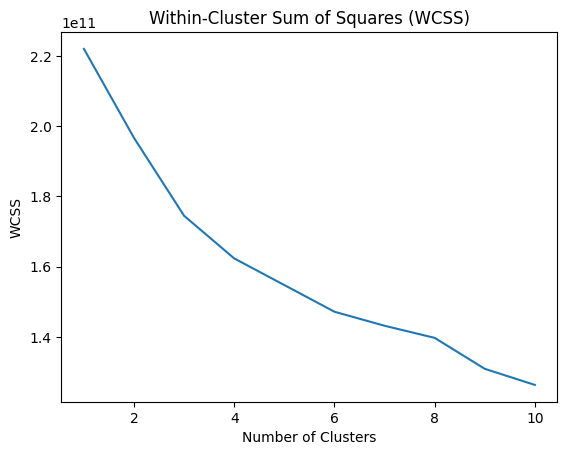

Elbow point: 7 clusters
Silhouette score for 7 clusters: 0.073


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your dataset from a CSV file
# p = pd.read_csv('your_dataset.csv')

# Specify the target column
target_column = 'Target'
X = p.drop(target_column, axis=1).values
y_true = p[target_column].values

# Compute the WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS
plt.plot(range(1, 11), wcss)
plt.title('Within-Cluster Sum of Squares (WCSS)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Find the elbow point
elbow_index = np.argmin(np.abs(np.diff(wcss))) + 1
print(f'Elbow point: {elbow_index} clusters')

# Compute the silhouette score for the elbow point
sil_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print(f'Silhouette score for {elbow_index} clusters: {sil_score:.3f}')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from minisom import MiniSom
from sklearn.metrics import adjusted_rand_score, rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture

# Load your dataset from a CSV file

#X = dataset.drop('target_column', axis=1).values
#y_true = dataset['target_column'].values
X= p.iloc[:, :-1]
y_true= p.iloc[:, -1]

# k-means
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
labels_kmeans = kmeans.labels_
kmeans_rand_index = rand_score(y_true, labels_kmeans)

# Single Linkage
single_linkage = AgglomerativeClustering(n_clusters=7, linkage='single').fit(X)
labels_single_linkage = single_linkage.labels_
single_linkage_rand_index = rand_score(y_true, labels_single_linkage)

# Agglomerative
agglomerative = AgglomerativeClustering(n_clusters=7, linkage='ward').fit(X)
labels_agglomerative = agglomerative.labels_
agglomerative_rand_index = rand_score(y_true, labels_agglomerative)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X)
dbscan_rand_index = rand_score(y_true, y_pred_dbscan)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=7, random_state=42, affinity='nearest_neighbors')
y_pred_spectral = spectral.fit_predict(X)
spectral_rand_index = rand_score(y_true, y_pred_spectral)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=7, random_state=42)
y_pred_gmm = gmm.fit_predict(X)
gmm_rand_index = rand_score(y_true, y_pred_gmm)

# SOM
n_features = p.shape[1]
som = MiniSom(4, 4, n_features, sigma=0.5, learning_rate=0.5)
som.train_random(p.values, 100)
labels_som = []
for x in p.values:
    winner = som.winner(x)
    labels_som.append(winner[0] * 4 + winner[1])
labels_som = np.array(labels_som)
som_rand_index = rand_score(y_true, labels_som)

# Print Rand Index for each clustering algorithm
print("K-Means Rand Index:", kmeans_rand_index)
print("Single Linkage Rand Index:", single_linkage_rand_index)
print("Agglomerative Rand Index:", agglomerative_rand_index)
print(f'DBSCAN Rand Index: {dbscan_rand_index}')
print(f'Spectral Clustering Rand Index: {spectral_rand_index}')
print(f'GMM Rand Index: {gmm_rand_index}')
print("SOM Rand Index:", som_rand_index)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Rand Index: 0.6463223787167449
Single Linkage Rand Index: 0.6001564945226917
Agglomerative Rand Index: 0.6353677621283255
DBSCAN Rand Index: 0.5402973395931142
Spectral Clustering Rand Index: 0.5567292644757433
GMM Rand Index: 0.6576682316118936
SOM Rand Index: 0.6118935837245696


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from minisom import MiniSom
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture

# Load your dataset from a CSV file

#X = dataset.drop('target_column', axis=1).values
#y_true = dataset['target_column'].values
X= p.iloc[:, :-1]
y_true= p.iloc[:, -1]

# k-means
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
labels_kmeans = kmeans.labels_
kmeans_ari = adjusted_rand_score(y_true, labels_kmeans)

# Single Linkage
single_linkage = AgglomerativeClustering(n_clusters=7, linkage='single').fit(X)
labels_single_linkage = single_linkage.labels_
single_linkage_ari = adjusted_rand_score(y_true, labels_single_linkage)

# Agglomerative
agglomerative = AgglomerativeClustering(n_clusters=7, linkage='ward').fit(X)
labels_agglomerative = agglomerative.labels_
agglomerative_ari = adjusted_rand_score(y_true, labels_agglomerative)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X)
dbscan_ari = adjusted_rand_score(y_true, y_pred_dbscan)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=7, random_state=42, affinity='nearest_neighbors')
y_pred_spectral = spectral.fit_predict(X)
spectral_ari = adjusted_rand_score(y_true, y_pred_spectral)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=7, random_state=42)
y_pred_gmm = gmm.fit_predict(X)
gmm_ari = adjusted_rand_score(y_true, y_pred_gmm)

# SOM
n_features = p.shape[1]
som = MiniSom(4, 4, n_features, sigma=0.5, learning_rate=0.5)
som.train_random(p.values, 100)
labels_som = []
for x in p.values:
    winner = som.winner(x)
    labels_som.append(winner[0] * 4 + winner[1])
labels_som = np.array(labels_som)
som_ari = adjusted_rand_score(y_true, labels_som)

# Print the adjusted rand index for each clustering algorithm
print("K-Means Adjusted Rand Index:", kmeans_ari)
print("Single Linkage Adjusted Rand Index:", single_linkage_ari)
print("Agglomerative Adjusted Rand Index:", agglomerative_ari)
print(f'DBSCAN Adjusted Rand Index: {dbscan_ari}')
print(f'Spectral Clustering Adjusted Rand Index: {spectral_ari}')
print(f'GMM Adjusted Rand Index: {gmm_ari}')
print("SOM Adjusted Rand Index:", som_ari)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Adjusted Rand Index: 0.32430505558210165
Single Linkage Adjusted Rand Index: 0.15406063408729243
Agglomerative Adjusted Rand Index: 0.3021994470771778
DBSCAN Adjusted Rand Index: 0.0
Spectral Clustering Adjusted Rand Index: 0.16127354326585558
GMM Adjusted Rand Index: 0.3452316822963997
SOM Adjusted Rand Index: 0.3665070692277362
